In [1]:
import os
import pandas as pd

# 데이터 병합

In [2]:
def merge_data(news_data, price_data, groupby):
    '''
    news_data : 뉴스데이터로, 'year','month'(또는 'week'), 'name_top_topic', '언론사' 포함
    price_data : 부동산 가격으로, 'year','month'(또는 'week') 포함
    groupby : 'month' 또는 'week'
    '''
    # 뉴스데이터 토픽
    group_news_data = news_data.groupby(['year',groupby])[ 'name_top_topic'].value_counts()
    group_news_data.name = None
    group_news_data = group_news_data.unstack('name_top_topic')
    group_news_data.columns = ['topic_count_'+str(cnt) for cnt in group_news_data.columns]
    group_news_data.reset_index(inplace=True)
    
    # 뉴스데이터 언론사
    group_press_data = news_data.groupby(['year',groupby])['언론사'].value_counts()
    group_press_data.name = None
    group_press_data = group_press_data.unstack('언론사')
    group_press_data.columns = ['press_'+str(cnt) for cnt in group_press_data.columns]
    group_press_data.reset_index(inplace=True)

    # 데이터 병합
    data = pd.merge(
        pd.merge(group_news_data,price_data, on=['year', groupby],how='left'),
        group_press_data, on=['year', groupby],how='left')
    data.set_index(['year', groupby], inplace=True)
    return data

In [3]:
path_raw_data = '../data/target/'
file_list = os.listdir(path_raw_data)
file_list

['target_아파트_매매_month.csv',
 'target_아파트_매매_week.csv',
 'target_아파트_월세_month.csv',
 'target_아파트_월세_week.csv',
 'target_아파트_전세_month.csv',
 'target_아파트_전세_week.csv',
 'target_연립다세대_매매_month.csv',
 'target_연립다세대_매매_week.csv',
 'target_연립다세대_월세_month.csv',
 'target_연립다세대_월세_week.csv',
 'target_연립다세대_전세_month.csv',
 'target_연립다세대_전세_week.csv',
 'target_오피스텔_매매_month.csv',
 'target_오피스텔_매매_week.csv',
 'target_오피스텔_월세_month.csv',
 'target_오피스텔_월세_week.csv',
 'target_오피스텔_전세_month.csv',
 'target_오피스텔_전세_week.csv']

In [4]:
news_data = pd.read_pickle('../data/news/topic_data.pkl')

n=1
price_data = pd.read_csv(path_raw_data + file_list[n], index_col=0)

data = merge_data(news_data, price_data, groupby='week').fillna(0)
data.head()

topic_count_0.0  topic_count_1.0  topic_count_2.0  topic_count_3.0  \
year week                                                                       
2017 1                 393              322              192              171   
     2                 357              302              182              153   
     3                 290              358              201              160   
     4                 287              370              157              134   
     5                 313              462              191              106   

           topic_count_4.0  topic_count_5.0  topic_count_6.0  topic_count_7.0  \
year week                                                                       
2017 1                 231              177              306              317   
     2                 232              180              355              297   
     3                 194              223              369              365   
     4                  96              110              262              266   
     5                 135              222              231              281   

           month   pct_송파구  ...  press_중앙일보  press_충북일보  press_충청일보  \
year week                   ...                                       
2017 1         1  0.010933  ...        38.0        11.0        12.0   
     2         1 -0.030504  ...        36.0        13.0         7.0   
     3         1 -0.033733  ...        45.0        12.0        10.0   
     4         1  0.004349  ...        29.0         6.0         7.0   
     5         1  0.066323  ...        41.0        12.0         8.0   

           press_충청투데이  press_파이낸셜뉴스  press_한겨레  press_한국경제  press_한국일보  \
year week                                                                 
2017 1            20.0         119.0       17.0       171.0        31.0   
     2            27.0         108.0       16.0       195.0        16.0   
     3            21.0         101.0       17.0       205.0        22.0   
     4            18.0          88.0        5.0       135.0        18.0   
     5            12.0          81.0       11.0       192.0        22.0   

           press_한라일보  press_헤럴드경제  
year week                           
2017 1           10.0        136.0  
     2            7.0        137.0  
     3            7.0        119.0  
     4            7.0        109.0  
     5            3.0        130.0  

[5 rows x 91 columns]

# 모델링

In [5]:
data.columns

Index(['topic_count_0.0', 'topic_count_1.0', 'topic_count_2.0',
       'topic_count_3.0', 'topic_count_4.0', 'topic_count_5.0',
       'topic_count_6.0', 'topic_count_7.0', 'month', 'pct_송파구', 'pct_노원구',
       'pct_성북구', 'pct_영등포구', 'pct_강서구', 'pct_강북구', 'pct_동대문구', 'pct_마포구',
       'pct_구로구', 'pct_관악구', 'pct_양천구', 'pct_도봉구', 'pct_서초구', 'pct_은평구',
       'pct_성동구', 'pct_동작구', 'pct_중구', 'pct_종로구', 'pct_중랑구', 'pct_서대문구',
       'pct_강남구', 'pct_금천구', 'pct_용산구', 'pct_광진구', 'pct_강동구', 'pct_동남권',
       'pct_동북권', 'pct_서남권', 'pct_서북권', 'pct_도심권', 'press_KBS', 'press_MBC',
       'press_OBS', 'press_SBS', 'press_YTN', 'press_강원도민일보', 'press_강원일보',
       'press_경기일보', 'press_경남도민일보', 'press_경남신문', 'press_경상일보', 'press_경인일보',
       'press_경향신문', 'press_광주매일신문', 'press_광주일보', 'press_국민일보', 'press_국제신문',
       'press_내일신문', 'press_대구일보', 'press_대전일보', 'press_디지털타임스', 'press_매일경제',
       'press_매일신문', 'press_머니투데이', 'press_무등일보', 'press_문화일보', 'press_부산일보',
       'press_서울경제', 'press_서울신문',

In [6]:
total_y = data[['pct_동남권', 'pct_동북권', 'pct_서남권', 'pct_서북권', 'pct_도심권']]
X = data[['topic_count_0.0', 'topic_count_1.0', 'topic_count_2.0', 'topic_count_3.0',
          'topic_count_4.0', 'topic_count_5.0',   'topic_count_6.0', 'topic_count_7.0',
          # 언론사
          # 'press_KBS', 'press_MBC', 'press_OBS', 'press_SBS', 'press_YTN', 'press_강원도민일보', 'press_강원일보',
          # 'press_경기일보', 'press_경남도민일보', 'press_경남신문', 'press_경상일보', 'press_경인일보', 'press_경향신문',
          # 'press_광주매일신문', 'press_광주일보', 'press_국민일보', 'press_국제신문', 'press_내일신문', 'press_대구일보',
          # 'press_대전일보', 'press_디지털타임스', 'press_매일경제', 'press_매일신문', 'press_머니투데이', 'press_무등일보',
          # 'press_문화일보', 'press_부산일보', 'press_서울경제', 'press_서울신문', 'press_세계일보', 'press_아시아경제',
          # 'press_아주경제', 'press_영남일보', 'press_울산매일', 'press_전남일보', 'press_전북도민일보', 'press_전북일보',
          # 'press_전자신문', 'press_제민일보', 'press_중도일보', 'press_중부매일', 'press_중부일보', 'press_중앙일보',
          # 'press_충북일보', 'press_충청일보', 'press_충청투데이', 'press_파이낸셜뉴스', 'press_한겨레',
          # 'press_한국경제', 'press_한국일보', 'press_한라일보', 'press_헤럴드경제'
         ]]

In [7]:
y = total_y['pct_동남권'].apply(lambda cnt : '상승'if(cnt>0) else '하락').astype('category')
y[:5]

year  week
2017  1       상승
      2       하락
      3       상승
      4       하락
      5       상승
Name: pct_동남권, dtype: category
Categories (2, object): ['상승', '하락']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

## 로지스틱

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logistic_model = LogisticRegression(random_state=2020, max_iter=100)

In [12]:
stf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2020)

In [13]:
score = cross_val_score(logistic_model, X_train, y_train, cv = stf, scoring = 'f1_micro')
score.mean()

0.775

In [14]:
logistic_model.fit(X_train,y_train)

LogisticRegression(random_state=2020)

In [15]:
y_pred = logistic_model.predict(X_test)

In [16]:
report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

          상승       0.67      0.44      0.53         9
          하락       0.50      0.71      0.59         7

    accuracy                           0.56        16
   macro avg       0.58      0.58      0.56        16
weighted avg       0.59      0.56      0.56        16



In [17]:
print("F1 : %.3f" % f1_score(y_test, y_pred, average = 'micro'))

F1 : 0.562


## xgboost

 incremental Learning 가능

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
xgb_rg = XGBClassifier()

In [20]:
xgb_params = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid_xgb = GridSearchCV(xgb_rg, param_grid=xgb_params, cv=5, scoring='f1_micro')

evals = [(X_test, y_test)]
grid_xgb.fit(X_train, y_train, eval_set=evals)

[0]	validation_0-error:0.6875
[1]	validation_0-error:0.6875
[2]	validation_0-error:0.6875
[3]	validation_0-error:0.6875
[4]	validation_0-error:0.6875
[5]	validation_0-error:0.6875
[6]	validation_0-error:0.6875
[7]	validation_0-error:0.6875
[8]	validation_0-error:0.6875
[9]	validation_0-error:0.6875
[10]	validation_0-error:0.6875
[11]	validation_0-error:0.6875
[12]	validation_0-error:0.6875
[13]	validation_0-error:0.6875
[14]	validation_0-error:0.6875
[15]	validation_0-error:0.6875
[16]	validation_0-error:0.6875
[17]	validation_0-error:0.6875
[18]	validation_0-error:0.6875
[19]	validation_0-error:0.6875
[20]	validation_0-error:0.6875
[21]	validation_0-error:0.6875
[22]	validation_0-error:0.6875
[23]	validation_0-error:0.6875
[24]	validation_0-error:0.6875
[25]	validation_0-error:0.6875
[26]	validation_0-error:0.6875
[27]	validation_0-error:0.6875
[28]	validation_0-error:0.6875
[29]	validation_0-error:0.6875
[30]	validation_0-error:0.6875
[31]	validation_0-error:0.6875
[32]	validation_0-

[69]	validation_0-error:0.5
[70]	validation_0-error:0.5
[71]	validation_0-error:0.5
[72]	validation_0-error:0.5
[73]	validation_0-error:0.5
[74]	validation_0-error:0.5
[75]	validation_0-error:0.5
[76]	validation_0-error:0.5
[77]	validation_0-error:0.5
[78]	validation_0-error:0.5
[79]	validation_0-error:0.5
[80]	validation_0-error:0.5
[81]	validation_0-error:0.5
[82]	validation_0-error:0.5
[83]	validation_0-error:0.5
[84]	validation_0-error:0.5
[85]	validation_0-error:0.5
[86]	validation_0-error:0.5
[87]	validation_0-error:0.5
[88]	validation_0-error:0.5
[89]	validation_0-error:0.5
[90]	validation_0-error:0.5
[91]	validation_0-error:0.5
[92]	validation_0-error:0.5
[93]	validation_0-error:0.5
[94]	validation_0-error:0.5
[95]	validation_0-error:0.5
[96]	validation_0-error:0.5
[97]	validation_0-error:0.5
[98]	validation_0-error:0.5
[99]	validation_0-error:0.5
[100]	validation_0-error:0.5
[101]	validation_0-error:0.5
[102]	validation_0-error:0.5
[103]	validation_0-error:0.5
[104]	validation

[150]	validation_0-error:0.5
[151]	validation_0-error:0.5
[152]	validation_0-error:0.5
[153]	validation_0-error:0.5
[154]	validation_0-error:0.5
[155]	validation_0-error:0.5
[156]	validation_0-error:0.5
[157]	validation_0-error:0.5
[158]	validation_0-error:0.5
[159]	validation_0-error:0.5
[160]	validation_0-error:0.5
[161]	validation_0-error:0.5
[162]	validation_0-error:0.5
[163]	validation_0-error:0.5
[164]	validation_0-error:0.5
[165]	validation_0-error:0.5
[166]	validation_0-error:0.5
[167]	validation_0-error:0.5
[168]	validation_0-error:0.5
[169]	validation_0-error:0.5
[170]	validation_0-error:0.5
[171]	validation_0-error:0.5
[172]	validation_0-error:0.5
[173]	validation_0-error:0.5
[174]	validation_0-error:0.5
[175]	validation_0-error:0.5
[176]	validation_0-error:0.5
[177]	validation_0-error:0.5
[178]	validation_0-error:0.5
[179]	validation_0-error:0.5
[180]	validation_0-error:0.5
[181]	validation_0-error:0.5
[182]	validation_0-error:0.5
[183]	validation_0-error:0.5
[184]	validati

[19]	validation_0-error:0.5625
[20]	validation_0-error:0.5625
[21]	validation_0-error:0.5625
[22]	validation_0-error:0.6875
[23]	validation_0-error:0.6875
[24]	validation_0-error:0.6875
[25]	validation_0-error:0.6875
[26]	validation_0-error:0.6875
[27]	validation_0-error:0.6875
[28]	validation_0-error:0.6875
[29]	validation_0-error:0.6875
[30]	validation_0-error:0.6875
[31]	validation_0-error:0.6875
[32]	validation_0-error:0.6875
[33]	validation_0-error:0.6875
[34]	validation_0-error:0.6875
[35]	validation_0-error:0.625
[36]	validation_0-error:0.6875
[37]	validation_0-error:0.625
[38]	validation_0-error:0.625
[39]	validation_0-error:0.625
[40]	validation_0-error:0.625
[41]	validation_0-error:0.625
[42]	validation_0-error:0.625
[43]	validation_0-error:0.625
[44]	validation_0-error:0.625
[45]	validation_0-error:0.5
[46]	validation_0-error:0.5
[47]	validation_0-error:0.5
[48]	validation_0-error:0.5
[49]	validation_0-error:0.5
[50]	validation_0-error:0.5
[51]	validation_0-error:0.5
[52]	va

[86]	validation_0-error:0.6875
[87]	validation_0-error:0.6875
[88]	validation_0-error:0.6875
[89]	validation_0-error:0.6875
[90]	validation_0-error:0.6875
[91]	validation_0-error:0.6875
[92]	validation_0-error:0.6875
[93]	validation_0-error:0.6875
[94]	validation_0-error:0.6875
[95]	validation_0-error:0.6875
[96]	validation_0-error:0.6875
[97]	validation_0-error:0.6875
[98]	validation_0-error:0.6875
[99]	validation_0-error:0.6875
[100]	validation_0-error:0.6875
[101]	validation_0-error:0.6875
[102]	validation_0-error:0.6875
[103]	validation_0-error:0.6875
[104]	validation_0-error:0.6875
[105]	validation_0-error:0.6875
[106]	validation_0-error:0.6875
[107]	validation_0-error:0.6875
[108]	validation_0-error:0.6875
[109]	validation_0-error:0.6875
[110]	validation_0-error:0.6875
[111]	validation_0-error:0.6875
[112]	validation_0-error:0.6875
[113]	validation_0-error:0.6875
[114]	validation_0-error:0.6875
[115]	validation_0-error:0.6875
[116]	validation_0-error:0.6875
[117]	validation_0-err

[343]	validation_0-error:0.6875
[344]	validation_0-error:0.6875
[345]	validation_0-error:0.6875
[346]	validation_0-error:0.6875
[347]	validation_0-error:0.6875
[348]	validation_0-error:0.6875
[349]	validation_0-error:0.6875
[350]	validation_0-error:0.6875
[351]	validation_0-error:0.6875
[352]	validation_0-error:0.6875
[353]	validation_0-error:0.6875
[354]	validation_0-error:0.6875
[355]	validation_0-error:0.6875
[356]	validation_0-error:0.6875
[357]	validation_0-error:0.6875
[358]	validation_0-error:0.6875
[359]	validation_0-error:0.6875
[360]	validation_0-error:0.6875
[361]	validation_0-error:0.6875
[362]	validation_0-error:0.6875
[363]	validation_0-error:0.6875
[364]	validation_0-error:0.6875
[365]	validation_0-error:0.6875
[366]	validation_0-error:0.6875
[367]	validation_0-error:0.6875
[368]	validation_0-error:0.6875
[369]	validation_0-error:0.6875
[370]	validation_0-error:0.6875
[371]	validation_0-error:0.6875
[372]	validation_0-error:0.6875
[373]	validation_0-error:0.6875
[374]	va

[216]	validation_0-error:0.375
[217]	validation_0-error:0.375
[218]	validation_0-error:0.375
[219]	validation_0-error:0.375
[220]	validation_0-error:0.375
[221]	validation_0-error:0.375
[222]	validation_0-error:0.375
[223]	validation_0-error:0.375
[224]	validation_0-error:0.375
[225]	validation_0-error:0.375
[226]	validation_0-error:0.375
[227]	validation_0-error:0.375
[228]	validation_0-error:0.375
[229]	validation_0-error:0.375
[230]	validation_0-error:0.375
[231]	validation_0-error:0.375
[232]	validation_0-error:0.375
[233]	validation_0-error:0.375
[234]	validation_0-error:0.3125
[235]	validation_0-error:0.3125
[236]	validation_0-error:0.3125
[237]	validation_0-error:0.3125
[238]	validation_0-error:0.3125
[239]	validation_0-error:0.3125
[240]	validation_0-error:0.3125
[241]	validation_0-error:0.3125
[242]	validation_0-error:0.3125
[243]	validation_0-error:0.3125
[244]	validation_0-error:0.3125
[245]	validation_0-error:0.3125
[246]	validation_0-error:0.3125
[247]	validation_0-error:0

[87]	validation_0-error:0.5
[88]	validation_0-error:0.5
[89]	validation_0-error:0.5
[90]	validation_0-error:0.5
[91]	validation_0-error:0.5
[92]	validation_0-error:0.5
[93]	validation_0-error:0.5
[94]	validation_0-error:0.5
[95]	validation_0-error:0.5
[96]	validation_0-error:0.5
[97]	validation_0-error:0.5
[98]	validation_0-error:0.5
[99]	validation_0-error:0.5
[100]	validation_0-error:0.5
[101]	validation_0-error:0.5
[102]	validation_0-error:0.5
[103]	validation_0-error:0.5
[104]	validation_0-error:0.5
[105]	validation_0-error:0.5
[106]	validation_0-error:0.5
[107]	validation_0-error:0.5
[108]	validation_0-error:0.5
[109]	validation_0-error:0.5
[110]	validation_0-error:0.5
[111]	validation_0-error:0.5
[112]	validation_0-error:0.5
[113]	validation_0-error:0.5
[114]	validation_0-error:0.5
[115]	validation_0-error:0.5
[116]	validation_0-error:0.5
[117]	validation_0-error:0.5
[118]	validation_0-error:0.5
[119]	validation_0-error:0.5
[120]	validation_0-error:0.5
[121]	validation_0-error:0.

[360]	validation_0-error:0.4375
[361]	validation_0-error:0.4375
[362]	validation_0-error:0.4375
[363]	validation_0-error:0.4375
[364]	validation_0-error:0.4375
[365]	validation_0-error:0.4375
[366]	validation_0-error:0.4375
[367]	validation_0-error:0.4375
[368]	validation_0-error:0.4375
[369]	validation_0-error:0.4375
[370]	validation_0-error:0.4375
[371]	validation_0-error:0.4375
[372]	validation_0-error:0.4375
[373]	validation_0-error:0.4375
[374]	validation_0-error:0.4375
[375]	validation_0-error:0.4375
[376]	validation_0-error:0.4375
[377]	validation_0-error:0.4375
[378]	validation_0-error:0.4375
[379]	validation_0-error:0.4375
[380]	validation_0-error:0.4375
[381]	validation_0-error:0.4375
[382]	validation_0-error:0.4375
[383]	validation_0-error:0.4375
[384]	validation_0-error:0.4375
[385]	validation_0-error:0.4375
[386]	validation_0-error:0.4375
[387]	validation_0-error:0.4375
[388]	validation_0-error:0.4375
[389]	validation_0-error:0.4375
[390]	validation_0-error:0.4375
[391]	va

[224]	validation_0-error:0.375
[225]	validation_0-error:0.375
[226]	validation_0-error:0.375
[227]	validation_0-error:0.375
[228]	validation_0-error:0.375
[229]	validation_0-error:0.4375
[230]	validation_0-error:0.4375
[231]	validation_0-error:0.4375
[232]	validation_0-error:0.4375
[233]	validation_0-error:0.4375
[234]	validation_0-error:0.4375
[235]	validation_0-error:0.4375
[236]	validation_0-error:0.4375
[237]	validation_0-error:0.4375
[238]	validation_0-error:0.4375
[239]	validation_0-error:0.4375
[240]	validation_0-error:0.4375
[241]	validation_0-error:0.4375
[242]	validation_0-error:0.4375
[243]	validation_0-error:0.4375
[244]	validation_0-error:0.4375
[245]	validation_0-error:0.4375
[246]	validation_0-error:0.4375
[247]	validation_0-error:0.4375
[248]	validation_0-error:0.4375
[249]	validation_0-error:0.4375
[250]	validation_0-error:0.4375
[251]	validation_0-error:0.4375
[252]	validation_0-error:0.4375
[253]	validation_0-error:0.4375
[254]	validation_0-error:0.4375
[255]	validat

[88]	validation_0-error:0.4375
[89]	validation_0-error:0.4375
[90]	validation_0-error:0.4375
[91]	validation_0-error:0.4375
[92]	validation_0-error:0.4375
[93]	validation_0-error:0.4375
[94]	validation_0-error:0.4375
[95]	validation_0-error:0.4375
[96]	validation_0-error:0.4375
[97]	validation_0-error:0.4375
[98]	validation_0-error:0.4375
[99]	validation_0-error:0.4375
[100]	validation_0-error:0.4375
[101]	validation_0-error:0.4375
[102]	validation_0-error:0.4375
[103]	validation_0-error:0.4375
[104]	validation_0-error:0.4375
[105]	validation_0-error:0.4375
[106]	validation_0-error:0.4375
[107]	validation_0-error:0.4375
[108]	validation_0-error:0.4375
[109]	validation_0-error:0.4375
[110]	validation_0-error:0.4375
[111]	validation_0-error:0.4375
[112]	validation_0-error:0.4375
[113]	validation_0-error:0.4375
[114]	validation_0-error:0.4375
[115]	validation_0-error:0.4375
[116]	validation_0-error:0.4375
[117]	validation_0-error:0.4375
[118]	validation_0-error:0.4375
[119]	validation_0-e

[362]	validation_0-error:0.5
[363]	validation_0-error:0.5
[364]	validation_0-error:0.5
[365]	validation_0-error:0.5
[366]	validation_0-error:0.5
[367]	validation_0-error:0.5
[368]	validation_0-error:0.5
[369]	validation_0-error:0.5
[370]	validation_0-error:0.5
[371]	validation_0-error:0.5
[372]	validation_0-error:0.5
[373]	validation_0-error:0.5
[374]	validation_0-error:0.5
[375]	validation_0-error:0.5
[376]	validation_0-error:0.5
[377]	validation_0-error:0.5
[378]	validation_0-error:0.5
[379]	validation_0-error:0.5
[380]	validation_0-error:0.5
[381]	validation_0-error:0.5
[382]	validation_0-error:0.5
[383]	validation_0-error:0.5
[384]	validation_0-error:0.5
[385]	validation_0-error:0.5
[386]	validation_0-error:0.5
[387]	validation_0-error:0.5
[388]	validation_0-error:0.5
[389]	validation_0-error:0.5
[390]	validation_0-error:0.5
[391]	validation_0-error:0.5
[392]	validation_0-error:0.5
[393]	validation_0-error:0.5
[394]	validation_0-error:0.5
[395]	validation_0-error:0.5
[396]	validati

[226]	validation_0-error:0.6875
[227]	validation_0-error:0.6875
[228]	validation_0-error:0.6875
[229]	validation_0-error:0.6875
[230]	validation_0-error:0.6875
[231]	validation_0-error:0.6875
[232]	validation_0-error:0.6875
[233]	validation_0-error:0.6875
[234]	validation_0-error:0.6875
[235]	validation_0-error:0.6875
[236]	validation_0-error:0.6875
[237]	validation_0-error:0.6875
[238]	validation_0-error:0.6875
[239]	validation_0-error:0.6875
[240]	validation_0-error:0.6875
[241]	validation_0-error:0.6875
[242]	validation_0-error:0.6875
[243]	validation_0-error:0.6875
[244]	validation_0-error:0.6875
[245]	validation_0-error:0.6875
[246]	validation_0-error:0.6875
[247]	validation_0-error:0.6875
[248]	validation_0-error:0.6875
[249]	validation_0-error:0.6875
[250]	validation_0-error:0.6875
[251]	validation_0-error:0.6875
[252]	validation_0-error:0.6875
[253]	validation_0-error:0.6875
[254]	validation_0-error:0.6875
[255]	validation_0-error:0.6875
[256]	validation_0-error:0.6875
[257]	va

[483]	validation_0-error:0.6875
[484]	validation_0-error:0.6875
[485]	validation_0-error:0.6875
[486]	validation_0-error:0.6875
[487]	validation_0-error:0.6875
[488]	validation_0-error:0.6875
[489]	validation_0-error:0.6875
[490]	validation_0-error:0.6875
[491]	validation_0-error:0.6875
[492]	validation_0-error:0.6875
[493]	validation_0-error:0.6875
[494]	validation_0-error:0.6875
[495]	validation_0-error:0.6875
[496]	validation_0-error:0.6875
[497]	validation_0-error:0.6875
[498]	validation_0-error:0.6875
[499]	validation_0-error:0.6875
[500]	validation_0-error:0.6875
[501]	validation_0-error:0.6875
[502]	validation_0-error:0.6875
[503]	validation_0-error:0.6875
[504]	validation_0-error:0.6875
[505]	validation_0-error:0.6875
[506]	validation_0-error:0.6875
[507]	validation_0-error:0.6875
[508]	validation_0-error:0.6875
[509]	validation_0-error:0.6875
[510]	validation_0-error:0.6875
[511]	validation_0-error:0.6875
[512]	validation_0-error:0.6875
[513]	validation_0-error:0.6875
[514]	va

[154]	validation_0-error:0.375
[155]	validation_0-error:0.375
[156]	validation_0-error:0.375
[157]	validation_0-error:0.375
[158]	validation_0-error:0.375
[159]	validation_0-error:0.375
[160]	validation_0-error:0.375
[161]	validation_0-error:0.375
[162]	validation_0-error:0.375
[163]	validation_0-error:0.375
[164]	validation_0-error:0.375
[165]	validation_0-error:0.375
[166]	validation_0-error:0.375
[167]	validation_0-error:0.375
[168]	validation_0-error:0.375
[169]	validation_0-error:0.375
[170]	validation_0-error:0.375
[171]	validation_0-error:0.375
[172]	validation_0-error:0.375
[173]	validation_0-error:0.375
[174]	validation_0-error:0.375
[175]	validation_0-error:0.375
[176]	validation_0-error:0.375
[177]	validation_0-error:0.375
[178]	validation_0-error:0.375
[179]	validation_0-error:0.375
[180]	validation_0-error:0.375
[181]	validation_0-error:0.375
[182]	validation_0-error:0.375
[183]	validation_0-error:0.375
[184]	validation_0-error:0.375
[185]	validation_0-error:0.375
[186]	va

[416]	validation_0-error:0.375
[417]	validation_0-error:0.375
[418]	validation_0-error:0.375
[419]	validation_0-error:0.375
[420]	validation_0-error:0.375
[421]	validation_0-error:0.375
[422]	validation_0-error:0.375
[423]	validation_0-error:0.375
[424]	validation_0-error:0.375
[425]	validation_0-error:0.375
[426]	validation_0-error:0.375
[427]	validation_0-error:0.375
[428]	validation_0-error:0.375
[429]	validation_0-error:0.375
[430]	validation_0-error:0.375
[431]	validation_0-error:0.375
[432]	validation_0-error:0.375
[433]	validation_0-error:0.375
[434]	validation_0-error:0.375
[435]	validation_0-error:0.375
[436]	validation_0-error:0.375
[437]	validation_0-error:0.375
[438]	validation_0-error:0.375
[439]	validation_0-error:0.375
[440]	validation_0-error:0.375
[441]	validation_0-error:0.375
[442]	validation_0-error:0.375
[443]	validation_0-error:0.375
[444]	validation_0-error:0.375
[445]	validation_0-error:0.375
[446]	validation_0-error:0.375
[447]	validation_0-error:0.375
[448]	va

[90]	validation_0-error:0.5
[91]	validation_0-error:0.5
[92]	validation_0-error:0.5
[93]	validation_0-error:0.5
[94]	validation_0-error:0.5
[95]	validation_0-error:0.5
[96]	validation_0-error:0.5
[97]	validation_0-error:0.5
[98]	validation_0-error:0.5
[99]	validation_0-error:0.5
[100]	validation_0-error:0.5
[101]	validation_0-error:0.5
[102]	validation_0-error:0.5
[103]	validation_0-error:0.5
[104]	validation_0-error:0.5
[105]	validation_0-error:0.5
[106]	validation_0-error:0.5
[107]	validation_0-error:0.5
[108]	validation_0-error:0.5
[109]	validation_0-error:0.5
[110]	validation_0-error:0.5
[111]	validation_0-error:0.5
[112]	validation_0-error:0.5
[113]	validation_0-error:0.5
[114]	validation_0-error:0.5
[115]	validation_0-error:0.5
[116]	validation_0-error:0.5
[117]	validation_0-error:0.5
[118]	validation_0-error:0.5
[119]	validation_0-error:0.5
[120]	validation_0-error:0.5
[121]	validation_0-error:0.5
[122]	validation_0-error:0.5
[123]	validation_0-error:0.5
[124]	validation_0-error

[363]	validation_0-error:0.4375
[364]	validation_0-error:0.4375
[365]	validation_0-error:0.4375
[366]	validation_0-error:0.4375
[367]	validation_0-error:0.4375
[368]	validation_0-error:0.4375
[369]	validation_0-error:0.4375
[370]	validation_0-error:0.4375
[371]	validation_0-error:0.4375
[372]	validation_0-error:0.4375
[373]	validation_0-error:0.4375
[374]	validation_0-error:0.4375
[375]	validation_0-error:0.4375
[376]	validation_0-error:0.4375
[377]	validation_0-error:0.4375
[378]	validation_0-error:0.4375
[379]	validation_0-error:0.4375
[380]	validation_0-error:0.4375
[381]	validation_0-error:0.4375
[382]	validation_0-error:0.4375
[383]	validation_0-error:0.4375
[384]	validation_0-error:0.4375
[385]	validation_0-error:0.4375
[386]	validation_0-error:0.4375
[387]	validation_0-error:0.4375
[388]	validation_0-error:0.4375
[389]	validation_0-error:0.4375
[390]	validation_0-error:0.4375
[391]	validation_0-error:0.4375
[392]	validation_0-error:0.4375
[393]	validation_0-error:0.4375
[394]	va

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[323]	validation_0-error:0.5
[324]	validation_0-error:0.5
[325]	validation_0-error:0.5
[326]	validation_0-error:0.5
[327]	validation_0-error:0.5
[328]	validation_0-error:0.5
[329]	validation_0-error:0.5
[330]	validation_0-error:0.5
[331]	validation_0-error:0.5
[332]	validation_0-error:0.5
[333]	validation_0-error:0.5
[334]	validation_0-error:0.5
[335]	validation_0-error:0.5
[336]	validation_0-error:0.5
[337]	validation_0-error:0.5
[338]	validation_0-error:0.5
[339]	validation_0-error:0.5
[340]	validation_0-error:0.5
[341]	validation_0-error:0.5
[342]	validation_0-error:0.5
[343]	validation_0-error:0.5
[344]	validation_0-error:0.5
[345]	validation_0-error:0.5
[346]	validation_0-error:0.5
[347]	validation_0-error:0.5
[348]	validation_0-error:0.5
[349]	validation_0-error:0.5
[350]	validation_0-error:0.5
[351]	validation_0-error:0.5
[352]	validation_0-error:0.5
[353]	validation_0-error:0.5
[354]	validation_0-error:0.5
[355]	validation_0-error:0.5
[356]	validation_0-error:0.5
[357]	validati

[587]	validation_0-error:0.4375
[588]	validation_0-error:0.4375
[589]	validation_0-error:0.4375
[590]	validation_0-error:0.4375
[591]	validation_0-error:0.4375
[592]	validation_0-error:0.4375
[593]	validation_0-error:0.4375
[594]	validation_0-error:0.4375
[595]	validation_0-error:0.4375
[596]	validation_0-error:0.4375
[597]	validation_0-error:0.4375
[598]	validation_0-error:0.4375
[599]	validation_0-error:0.4375
[0]	validation_0-error:0.6875
[1]	validation_0-error:0.6875
[2]	validation_0-error:0.6875
[3]	validation_0-error:0.6875
[4]	validation_0-error:0.6875
[5]	validation_0-error:0.6875
[6]	validation_0-error:0.6875
[7]	validation_0-error:0.6875
[8]	validation_0-error:0.6875
[9]	validation_0-error:0.6875
[10]	validation_0-error:0.6875
[11]	validation_0-error:0.6875
[12]	validation_0-error:0.6875
[13]	validation_0-error:0.6875
[14]	validation_0-error:0.6875
[15]	validation_0-error:0.6875
[16]	validation_0-error:0.6875
[17]	validation_0-error:0.6875
[18]	validation_0-error:0.6875
[19]	

[51]	validation_0-error:0.3125
[52]	validation_0-error:0.3125
[53]	validation_0-error:0.3125
[54]	validation_0-error:0.3125
[55]	validation_0-error:0.3125
[56]	validation_0-error:0.3125
[57]	validation_0-error:0.3125
[58]	validation_0-error:0.3125
[59]	validation_0-error:0.3125
[60]	validation_0-error:0.3125
[61]	validation_0-error:0.3125
[62]	validation_0-error:0.3125
[63]	validation_0-error:0.3125
[64]	validation_0-error:0.3125
[65]	validation_0-error:0.3125
[66]	validation_0-error:0.3125
[67]	validation_0-error:0.3125
[68]	validation_0-error:0.3125
[69]	validation_0-error:0.3125
[70]	validation_0-error:0.3125
[71]	validation_0-error:0.375
[72]	validation_0-error:0.375
[73]	validation_0-error:0.375
[74]	validation_0-error:0.375
[75]	validation_0-error:0.375
[76]	validation_0-error:0.375
[77]	validation_0-error:0.375
[78]	validation_0-error:0.375
[79]	validation_0-error:0.375
[80]	validation_0-error:0.375
[81]	validation_0-error:0.375
[82]	validation_0-error:0.375
[83]	validation_0-er

[121]	validation_0-error:0.4375
[122]	validation_0-error:0.4375
[123]	validation_0-error:0.4375
[124]	validation_0-error:0.4375
[125]	validation_0-error:0.4375
[126]	validation_0-error:0.4375
[127]	validation_0-error:0.4375
[128]	validation_0-error:0.4375
[129]	validation_0-error:0.4375
[130]	validation_0-error:0.4375
[131]	validation_0-error:0.4375
[132]	validation_0-error:0.4375
[133]	validation_0-error:0.4375
[134]	validation_0-error:0.4375
[135]	validation_0-error:0.4375
[136]	validation_0-error:0.4375
[137]	validation_0-error:0.4375
[138]	validation_0-error:0.4375
[139]	validation_0-error:0.4375
[140]	validation_0-error:0.4375
[141]	validation_0-error:0.4375
[142]	validation_0-error:0.4375
[143]	validation_0-error:0.4375
[144]	validation_0-error:0.4375
[145]	validation_0-error:0.4375
[146]	validation_0-error:0.4375
[147]	validation_0-error:0.4375
[148]	validation_0-error:0.4375
[149]	validation_0-error:0.4375
[150]	validation_0-error:0.4375
[151]	validation_0-error:0.4375
[152]	va

[188]	validation_0-error:0.5
[189]	validation_0-error:0.5
[190]	validation_0-error:0.5
[191]	validation_0-error:0.5
[192]	validation_0-error:0.5
[193]	validation_0-error:0.5
[194]	validation_0-error:0.5
[195]	validation_0-error:0.5
[196]	validation_0-error:0.5
[197]	validation_0-error:0.5
[198]	validation_0-error:0.5
[199]	validation_0-error:0.5
[0]	validation_0-error:0.5625
[1]	validation_0-error:0.5625
[2]	validation_0-error:0.5625
[3]	validation_0-error:0.5625
[4]	validation_0-error:0.5625
[5]	validation_0-error:0.6875
[6]	validation_0-error:0.6875
[7]	validation_0-error:0.6875
[8]	validation_0-error:0.625
[9]	validation_0-error:0.5
[10]	validation_0-error:0.5
[11]	validation_0-error:0.5
[12]	validation_0-error:0.5
[13]	validation_0-error:0.4375
[14]	validation_0-error:0.4375
[15]	validation_0-error:0.4375
[16]	validation_0-error:0.4375
[17]	validation_0-error:0.4375
[18]	validation_0-error:0.4375
[19]	validation_0-error:0.4375
[20]	validation_0-error:0.4375
[21]	validation_0-error:

[63]	validation_0-error:0.6875
[64]	validation_0-error:0.6875
[65]	validation_0-error:0.6875
[66]	validation_0-error:0.6875
[67]	validation_0-error:0.6875
[68]	validation_0-error:0.6875
[69]	validation_0-error:0.6875
[70]	validation_0-error:0.6875
[71]	validation_0-error:0.6875
[72]	validation_0-error:0.6875
[73]	validation_0-error:0.6875
[74]	validation_0-error:0.6875
[75]	validation_0-error:0.6875
[76]	validation_0-error:0.6875
[77]	validation_0-error:0.6875
[78]	validation_0-error:0.6875
[79]	validation_0-error:0.6875
[80]	validation_0-error:0.6875
[81]	validation_0-error:0.6875
[82]	validation_0-error:0.6875
[83]	validation_0-error:0.6875
[84]	validation_0-error:0.6875
[85]	validation_0-error:0.6875
[86]	validation_0-error:0.6875
[87]	validation_0-error:0.6875
[88]	validation_0-error:0.6875
[89]	validation_0-error:0.6875
[90]	validation_0-error:0.6875
[91]	validation_0-error:0.6875
[92]	validation_0-error:0.6875
[93]	validation_0-error:0.6875
[94]	validation_0-error:0.6875
[95]	val

[321]	validation_0-error:0.6875
[322]	validation_0-error:0.6875
[323]	validation_0-error:0.6875
[324]	validation_0-error:0.6875
[325]	validation_0-error:0.6875
[326]	validation_0-error:0.6875
[327]	validation_0-error:0.6875
[328]	validation_0-error:0.6875
[329]	validation_0-error:0.6875
[330]	validation_0-error:0.6875
[331]	validation_0-error:0.6875
[332]	validation_0-error:0.6875
[333]	validation_0-error:0.6875
[334]	validation_0-error:0.6875
[335]	validation_0-error:0.6875
[336]	validation_0-error:0.6875
[337]	validation_0-error:0.6875
[338]	validation_0-error:0.6875
[339]	validation_0-error:0.6875
[340]	validation_0-error:0.6875
[341]	validation_0-error:0.6875
[342]	validation_0-error:0.6875
[343]	validation_0-error:0.6875
[344]	validation_0-error:0.6875
[345]	validation_0-error:0.6875
[346]	validation_0-error:0.6875
[347]	validation_0-error:0.6875
[348]	validation_0-error:0.6875
[349]	validation_0-error:0.6875
[350]	validation_0-error:0.6875
[351]	validation_0-error:0.6875
[352]	va

[187]	validation_0-error:0.375
[188]	validation_0-error:0.375
[189]	validation_0-error:0.375
[190]	validation_0-error:0.375
[191]	validation_0-error:0.375
[192]	validation_0-error:0.375
[193]	validation_0-error:0.375
[194]	validation_0-error:0.375
[195]	validation_0-error:0.375
[196]	validation_0-error:0.375
[197]	validation_0-error:0.375
[198]	validation_0-error:0.375
[199]	validation_0-error:0.375
[200]	validation_0-error:0.375
[201]	validation_0-error:0.375
[202]	validation_0-error:0.375
[203]	validation_0-error:0.375
[204]	validation_0-error:0.375
[205]	validation_0-error:0.375
[206]	validation_0-error:0.375
[207]	validation_0-error:0.375
[208]	validation_0-error:0.375
[209]	validation_0-error:0.375
[210]	validation_0-error:0.375
[211]	validation_0-error:0.375
[212]	validation_0-error:0.375
[213]	validation_0-error:0.375
[214]	validation_0-error:0.375
[215]	validation_0-error:0.375
[216]	validation_0-error:0.375
[217]	validation_0-error:0.375
[218]	validation_0-error:0.375
[219]	va

[57]	validation_0-error:0.4375
[58]	validation_0-error:0.4375
[59]	validation_0-error:0.4375
[60]	validation_0-error:0.4375
[61]	validation_0-error:0.4375
[62]	validation_0-error:0.4375
[63]	validation_0-error:0.4375
[64]	validation_0-error:0.4375
[65]	validation_0-error:0.4375
[66]	validation_0-error:0.4375
[67]	validation_0-error:0.4375
[68]	validation_0-error:0.4375
[69]	validation_0-error:0.4375
[70]	validation_0-error:0.4375
[71]	validation_0-error:0.4375
[72]	validation_0-error:0.4375
[73]	validation_0-error:0.4375
[74]	validation_0-error:0.4375
[75]	validation_0-error:0.4375
[76]	validation_0-error:0.4375
[77]	validation_0-error:0.4375
[78]	validation_0-error:0.4375
[79]	validation_0-error:0.4375
[80]	validation_0-error:0.4375
[81]	validation_0-error:0.4375
[82]	validation_0-error:0.4375
[83]	validation_0-error:0.4375
[84]	validation_0-error:0.4375
[85]	validation_0-error:0.4375
[86]	validation_0-error:0.4375
[87]	validation_0-error:0.4375
[88]	validation_0-error:0.4375
[89]	val

[315]	validation_0-error:0.4375
[316]	validation_0-error:0.4375
[317]	validation_0-error:0.4375
[318]	validation_0-error:0.4375
[319]	validation_0-error:0.4375
[320]	validation_0-error:0.4375
[321]	validation_0-error:0.4375
[322]	validation_0-error:0.4375
[323]	validation_0-error:0.4375
[324]	validation_0-error:0.4375
[325]	validation_0-error:0.4375
[326]	validation_0-error:0.4375
[327]	validation_0-error:0.4375
[328]	validation_0-error:0.4375
[329]	validation_0-error:0.4375
[330]	validation_0-error:0.4375
[331]	validation_0-error:0.4375
[332]	validation_0-error:0.4375
[333]	validation_0-error:0.4375
[334]	validation_0-error:0.4375
[335]	validation_0-error:0.4375
[336]	validation_0-error:0.4375
[337]	validation_0-error:0.4375
[338]	validation_0-error:0.4375
[339]	validation_0-error:0.4375
[340]	validation_0-error:0.4375
[341]	validation_0-error:0.4375
[342]	validation_0-error:0.4375
[343]	validation_0-error:0.4375
[344]	validation_0-error:0.4375
[345]	validation_0-error:0.4375
[346]	va

[181]	validation_0-error:0.5
[182]	validation_0-error:0.5
[183]	validation_0-error:0.5
[184]	validation_0-error:0.5
[185]	validation_0-error:0.5
[186]	validation_0-error:0.5
[187]	validation_0-error:0.5
[188]	validation_0-error:0.5
[189]	validation_0-error:0.5
[190]	validation_0-error:0.5
[191]	validation_0-error:0.5
[192]	validation_0-error:0.5
[193]	validation_0-error:0.5
[194]	validation_0-error:0.5
[195]	validation_0-error:0.5
[196]	validation_0-error:0.5
[197]	validation_0-error:0.5
[198]	validation_0-error:0.5
[199]	validation_0-error:0.5
[200]	validation_0-error:0.5
[201]	validation_0-error:0.5
[202]	validation_0-error:0.5
[203]	validation_0-error:0.5
[204]	validation_0-error:0.5
[205]	validation_0-error:0.5
[206]	validation_0-error:0.5
[207]	validation_0-error:0.5
[208]	validation_0-error:0.5
[209]	validation_0-error:0.5
[210]	validation_0-error:0.5
[211]	validation_0-error:0.5
[212]	validation_0-error:0.5
[213]	validation_0-error:0.5
[214]	validation_0-error:0.5
[215]	validati

[63]	validation_0-error:0.5
[64]	validation_0-error:0.5
[65]	validation_0-error:0.5
[66]	validation_0-error:0.5
[67]	validation_0-error:0.5
[68]	validation_0-error:0.5
[69]	validation_0-error:0.5
[70]	validation_0-error:0.5
[71]	validation_0-error:0.5
[72]	validation_0-error:0.5
[73]	validation_0-error:0.5
[74]	validation_0-error:0.5
[75]	validation_0-error:0.5
[76]	validation_0-error:0.5
[77]	validation_0-error:0.5
[78]	validation_0-error:0.5
[79]	validation_0-error:0.5
[80]	validation_0-error:0.5
[81]	validation_0-error:0.4375
[82]	validation_0-error:0.4375
[83]	validation_0-error:0.4375
[84]	validation_0-error:0.4375
[85]	validation_0-error:0.4375
[86]	validation_0-error:0.4375
[87]	validation_0-error:0.4375
[88]	validation_0-error:0.4375
[89]	validation_0-error:0.4375
[90]	validation_0-error:0.4375
[91]	validation_0-error:0.4375
[92]	validation_0-error:0.4375
[93]	validation_0-error:0.4375
[94]	validation_0-error:0.4375
[95]	validation_0-error:0.4375
[96]	validation_0-error:0.4375


[340]	validation_0-error:0.4375
[341]	validation_0-error:0.4375
[342]	validation_0-error:0.4375
[343]	validation_0-error:0.4375
[344]	validation_0-error:0.4375
[345]	validation_0-error:0.4375
[346]	validation_0-error:0.4375
[347]	validation_0-error:0.4375
[348]	validation_0-error:0.4375
[349]	validation_0-error:0.4375
[350]	validation_0-error:0.4375
[351]	validation_0-error:0.4375
[352]	validation_0-error:0.4375
[353]	validation_0-error:0.4375
[354]	validation_0-error:0.4375
[355]	validation_0-error:0.4375
[356]	validation_0-error:0.4375
[357]	validation_0-error:0.4375
[358]	validation_0-error:0.4375
[359]	validation_0-error:0.4375
[360]	validation_0-error:0.4375
[361]	validation_0-error:0.4375
[362]	validation_0-error:0.4375
[363]	validation_0-error:0.4375
[364]	validation_0-error:0.4375
[365]	validation_0-error:0.4375
[366]	validation_0-error:0.4375
[367]	validation_0-error:0.4375
[368]	validation_0-error:0.4375
[369]	validation_0-error:0.4375
[370]	validation_0-error:0.4375
[371]	va

[200]	validation_0-error:0.6875
[201]	validation_0-error:0.6875
[202]	validation_0-error:0.6875
[203]	validation_0-error:0.6875
[204]	validation_0-error:0.6875
[205]	validation_0-error:0.6875
[206]	validation_0-error:0.6875
[207]	validation_0-error:0.6875
[208]	validation_0-error:0.6875
[209]	validation_0-error:0.6875
[210]	validation_0-error:0.6875
[211]	validation_0-error:0.6875
[212]	validation_0-error:0.6875
[213]	validation_0-error:0.6875
[214]	validation_0-error:0.6875
[215]	validation_0-error:0.6875
[216]	validation_0-error:0.6875
[217]	validation_0-error:0.6875
[218]	validation_0-error:0.6875
[219]	validation_0-error:0.6875
[220]	validation_0-error:0.6875
[221]	validation_0-error:0.6875
[222]	validation_0-error:0.6875
[223]	validation_0-error:0.6875
[224]	validation_0-error:0.6875
[225]	validation_0-error:0.6875
[226]	validation_0-error:0.6875
[227]	validation_0-error:0.6875
[228]	validation_0-error:0.6875
[229]	validation_0-error:0.6875
[230]	validation_0-error:0.6875
[231]	va

[457]	validation_0-error:0.6875
[458]	validation_0-error:0.6875
[459]	validation_0-error:0.6875
[460]	validation_0-error:0.6875
[461]	validation_0-error:0.6875
[462]	validation_0-error:0.6875
[463]	validation_0-error:0.6875
[464]	validation_0-error:0.6875
[465]	validation_0-error:0.6875
[466]	validation_0-error:0.6875
[467]	validation_0-error:0.6875
[468]	validation_0-error:0.6875
[469]	validation_0-error:0.6875
[470]	validation_0-error:0.6875
[471]	validation_0-error:0.6875
[472]	validation_0-error:0.6875
[473]	validation_0-error:0.6875
[474]	validation_0-error:0.6875
[475]	validation_0-error:0.6875
[476]	validation_0-error:0.6875
[477]	validation_0-error:0.6875
[478]	validation_0-error:0.6875
[479]	validation_0-error:0.6875
[480]	validation_0-error:0.6875
[481]	validation_0-error:0.6875
[482]	validation_0-error:0.6875
[483]	validation_0-error:0.6875
[484]	validation_0-error:0.6875
[485]	validation_0-error:0.6875
[486]	validation_0-error:0.6875
[487]	validation_0-error:0.6875
[488]	va

[124]	validation_0-error:0.375
[125]	validation_0-error:0.375
[126]	validation_0-error:0.375
[127]	validation_0-error:0.375
[128]	validation_0-error:0.375
[129]	validation_0-error:0.375
[130]	validation_0-error:0.375
[131]	validation_0-error:0.375
[132]	validation_0-error:0.375
[133]	validation_0-error:0.375
[134]	validation_0-error:0.375
[135]	validation_0-error:0.375
[136]	validation_0-error:0.375
[137]	validation_0-error:0.375
[138]	validation_0-error:0.375
[139]	validation_0-error:0.375
[140]	validation_0-error:0.375
[141]	validation_0-error:0.375
[142]	validation_0-error:0.375
[143]	validation_0-error:0.375
[144]	validation_0-error:0.375
[145]	validation_0-error:0.375
[146]	validation_0-error:0.375
[147]	validation_0-error:0.375
[148]	validation_0-error:0.375
[149]	validation_0-error:0.375
[150]	validation_0-error:0.375
[151]	validation_0-error:0.375
[152]	validation_0-error:0.375
[153]	validation_0-error:0.375
[154]	validation_0-error:0.375
[155]	validation_0-error:0.375
[156]	va

[389]	validation_0-error:0.375
[390]	validation_0-error:0.375
[391]	validation_0-error:0.375
[392]	validation_0-error:0.375
[393]	validation_0-error:0.375
[394]	validation_0-error:0.375
[395]	validation_0-error:0.375
[396]	validation_0-error:0.375
[397]	validation_0-error:0.375
[398]	validation_0-error:0.375
[399]	validation_0-error:0.375
[400]	validation_0-error:0.375
[401]	validation_0-error:0.375
[402]	validation_0-error:0.375
[403]	validation_0-error:0.375
[404]	validation_0-error:0.375
[405]	validation_0-error:0.375
[406]	validation_0-error:0.375
[407]	validation_0-error:0.375
[408]	validation_0-error:0.375
[409]	validation_0-error:0.375
[410]	validation_0-error:0.375
[411]	validation_0-error:0.375
[412]	validation_0-error:0.375
[413]	validation_0-error:0.375
[414]	validation_0-error:0.375
[415]	validation_0-error:0.375
[416]	validation_0-error:0.375
[417]	validation_0-error:0.375
[418]	validation_0-error:0.375
[419]	validation_0-error:0.375
[420]	validation_0-error:0.375
[421]	va

[59]	validation_0-error:0.4375
[60]	validation_0-error:0.4375
[61]	validation_0-error:0.4375
[62]	validation_0-error:0.4375
[63]	validation_0-error:0.4375
[64]	validation_0-error:0.4375
[65]	validation_0-error:0.4375
[66]	validation_0-error:0.4375
[67]	validation_0-error:0.4375
[68]	validation_0-error:0.4375
[69]	validation_0-error:0.4375
[70]	validation_0-error:0.4375
[71]	validation_0-error:0.4375
[72]	validation_0-error:0.4375
[73]	validation_0-error:0.4375
[74]	validation_0-error:0.4375
[75]	validation_0-error:0.4375
[76]	validation_0-error:0.4375
[77]	validation_0-error:0.4375
[78]	validation_0-error:0.4375
[79]	validation_0-error:0.4375
[80]	validation_0-error:0.4375
[81]	validation_0-error:0.4375
[82]	validation_0-error:0.4375
[83]	validation_0-error:0.4375
[84]	validation_0-error:0.4375
[85]	validation_0-error:0.4375
[86]	validation_0-error:0.4375
[87]	validation_0-error:0.4375
[88]	validation_0-error:0.4375
[89]	validation_0-error:0.4375
[90]	validation_0-error:0.4375
[91]	val

[317]	validation_0-error:0.4375
[318]	validation_0-error:0.4375
[319]	validation_0-error:0.4375
[320]	validation_0-error:0.4375
[321]	validation_0-error:0.4375
[322]	validation_0-error:0.4375
[323]	validation_0-error:0.4375
[324]	validation_0-error:0.4375
[325]	validation_0-error:0.4375
[326]	validation_0-error:0.4375
[327]	validation_0-error:0.4375
[328]	validation_0-error:0.4375
[329]	validation_0-error:0.4375
[330]	validation_0-error:0.4375
[331]	validation_0-error:0.4375
[332]	validation_0-error:0.4375
[333]	validation_0-error:0.4375
[334]	validation_0-error:0.4375
[335]	validation_0-error:0.4375
[336]	validation_0-error:0.4375
[337]	validation_0-error:0.4375
[338]	validation_0-error:0.4375
[339]	validation_0-error:0.4375
[340]	validation_0-error:0.4375
[341]	validation_0-error:0.4375
[342]	validation_0-error:0.4375
[343]	validation_0-error:0.4375
[344]	validation_0-error:0.4375
[345]	validation_0-error:0.4375
[346]	validation_0-error:0.4375
[347]	validation_0-error:0.4375
[348]	va

[574]	validation_0-error:0.4375
[575]	validation_0-error:0.4375
[576]	validation_0-error:0.4375
[577]	validation_0-error:0.4375
[578]	validation_0-error:0.4375
[579]	validation_0-error:0.4375
[580]	validation_0-error:0.4375
[581]	validation_0-error:0.4375
[582]	validation_0-error:0.4375
[583]	validation_0-error:0.4375
[584]	validation_0-error:0.4375
[585]	validation_0-error:0.4375
[586]	validation_0-error:0.4375
[587]	validation_0-error:0.4375
[588]	validation_0-error:0.4375
[589]	validation_0-error:0.4375
[590]	validation_0-error:0.4375
[591]	validation_0-error:0.4375
[592]	validation_0-error:0.4375
[593]	validation_0-error:0.4375
[594]	validation_0-error:0.4375
[595]	validation_0-error:0.4375
[596]	validation_0-error:0.4375
[597]	validation_0-error:0.4375
[598]	validation_0-error:0.4375
[599]	validation_0-error:0.4375
[0]	validation_0-error:0.5625
[1]	validation_0-error:0.5625
[2]	validation_0-error:0.5625
[3]	validation_0-error:0.5625
[4]	validation_0-error:0.5625
[5]	validation_0-e

[246]	validation_0-error:0.5
[247]	validation_0-error:0.5
[248]	validation_0-error:0.5
[249]	validation_0-error:0.5
[250]	validation_0-error:0.5
[251]	validation_0-error:0.5
[252]	validation_0-error:0.5
[253]	validation_0-error:0.5
[254]	validation_0-error:0.5
[255]	validation_0-error:0.5
[256]	validation_0-error:0.5
[257]	validation_0-error:0.5
[258]	validation_0-error:0.5
[259]	validation_0-error:0.5
[260]	validation_0-error:0.5
[261]	validation_0-error:0.5
[262]	validation_0-error:0.5
[263]	validation_0-error:0.5
[264]	validation_0-error:0.5
[265]	validation_0-error:0.5
[266]	validation_0-error:0.5
[267]	validation_0-error:0.5
[268]	validation_0-error:0.5
[269]	validation_0-error:0.5
[270]	validation_0-error:0.5
[271]	validation_0-error:0.5
[272]	validation_0-error:0.5
[273]	validation_0-error:0.5
[274]	validation_0-error:0.5
[275]	validation_0-error:0.5
[276]	validation_0-error:0.5
[277]	validation_0-error:0.5
[278]	validation_0-error:0.5
[279]	validation_0-error:0.5
[280]	validati

[522]	validation_0-error:0.5625
[523]	validation_0-error:0.5625
[524]	validation_0-error:0.5625
[525]	validation_0-error:0.5625
[526]	validation_0-error:0.5625
[527]	validation_0-error:0.5625
[528]	validation_0-error:0.5625
[529]	validation_0-error:0.5625
[530]	validation_0-error:0.5625
[531]	validation_0-error:0.5625
[532]	validation_0-error:0.5625
[533]	validation_0-error:0.5625
[534]	validation_0-error:0.5625
[535]	validation_0-error:0.5625
[536]	validation_0-error:0.5625
[537]	validation_0-error:0.5625
[538]	validation_0-error:0.5625
[539]	validation_0-error:0.5625
[540]	validation_0-error:0.5625
[541]	validation_0-error:0.5625
[542]	validation_0-error:0.5625
[543]	validation_0-error:0.5625
[544]	validation_0-error:0.5625
[545]	validation_0-error:0.5625
[546]	validation_0-error:0.5625
[547]	validation_0-error:0.5625
[548]	validation_0-error:0.5625
[549]	validation_0-error:0.5625
[550]	validation_0-error:0.5625
[551]	validation_0-error:0.5625
[552]	validation_0-error:0.5625
[553]	va

[194]	validation_0-error:0.5
[195]	validation_0-error:0.5
[196]	validation_0-error:0.5
[197]	validation_0-error:0.5
[198]	validation_0-error:0.5
[199]	validation_0-error:0.5
[200]	validation_0-error:0.5
[201]	validation_0-error:0.5
[202]	validation_0-error:0.5
[203]	validation_0-error:0.5
[204]	validation_0-error:0.5
[205]	validation_0-error:0.5
[206]	validation_0-error:0.5
[207]	validation_0-error:0.5
[208]	validation_0-error:0.5
[209]	validation_0-error:0.5
[210]	validation_0-error:0.5
[211]	validation_0-error:0.5
[212]	validation_0-error:0.5
[213]	validation_0-error:0.5
[214]	validation_0-error:0.5
[215]	validation_0-error:0.5
[216]	validation_0-error:0.5
[217]	validation_0-error:0.5
[218]	validation_0-error:0.5
[219]	validation_0-error:0.5
[220]	validation_0-error:0.5
[221]	validation_0-error:0.5
[222]	validation_0-error:0.5
[223]	validation_0-error:0.5
[224]	validation_0-error:0.5
[225]	validation_0-error:0.5
[226]	validation_0-error:0.5
[227]	validation_0-error:0.5
[228]	validati

[462]	validation_0-error:0.4375
[463]	validation_0-error:0.4375
[464]	validation_0-error:0.4375
[465]	validation_0-error:0.4375
[466]	validation_0-error:0.4375
[467]	validation_0-error:0.4375
[468]	validation_0-error:0.4375
[469]	validation_0-error:0.4375
[470]	validation_0-error:0.4375
[471]	validation_0-error:0.4375
[472]	validation_0-error:0.4375
[473]	validation_0-error:0.4375
[474]	validation_0-error:0.4375
[475]	validation_0-error:0.4375
[476]	validation_0-error:0.4375
[477]	validation_0-error:0.4375
[478]	validation_0-error:0.4375
[479]	validation_0-error:0.4375
[480]	validation_0-error:0.4375
[481]	validation_0-error:0.4375
[482]	validation_0-error:0.4375
[483]	validation_0-error:0.4375
[484]	validation_0-error:0.4375
[485]	validation_0-error:0.4375
[486]	validation_0-error:0.4375
[487]	validation_0-error:0.4375
[488]	validation_0-error:0.4375
[489]	validation_0-error:0.4375
[490]	validation_0-error:0.4375
[491]	validation_0-error:0.4375
[492]	validation_0-error:0.4375
[493]	va

[122]	validation_0-error:0.6875
[123]	validation_0-error:0.6875
[124]	validation_0-error:0.6875
[125]	validation_0-error:0.6875
[126]	validation_0-error:0.6875
[127]	validation_0-error:0.6875
[128]	validation_0-error:0.6875
[129]	validation_0-error:0.6875
[130]	validation_0-error:0.6875
[131]	validation_0-error:0.6875
[132]	validation_0-error:0.6875
[133]	validation_0-error:0.6875
[134]	validation_0-error:0.6875
[135]	validation_0-error:0.6875
[136]	validation_0-error:0.6875
[137]	validation_0-error:0.6875
[138]	validation_0-error:0.6875
[139]	validation_0-error:0.6875
[140]	validation_0-error:0.6875
[141]	validation_0-error:0.6875
[142]	validation_0-error:0.6875
[143]	validation_0-error:0.6875
[144]	validation_0-error:0.6875
[145]	validation_0-error:0.6875
[146]	validation_0-error:0.6875
[147]	validation_0-error:0.6875
[148]	validation_0-error:0.6875
[149]	validation_0-error:0.6875
[150]	validation_0-error:0.6875
[151]	validation_0-error:0.6875
[152]	validation_0-error:0.6875
[153]	va

[188]	validation_0-error:0.375
[189]	validation_0-error:0.375
[190]	validation_0-error:0.375
[191]	validation_0-error:0.375
[192]	validation_0-error:0.375
[193]	validation_0-error:0.375
[194]	validation_0-error:0.375
[195]	validation_0-error:0.375
[196]	validation_0-error:0.375
[197]	validation_0-error:0.375
[198]	validation_0-error:0.375
[199]	validation_0-error:0.375
[0]	validation_0-error:0.5
[1]	validation_0-error:0.5
[2]	validation_0-error:0.5
[3]	validation_0-error:0.5
[4]	validation_0-error:0.5
[5]	validation_0-error:0.5
[6]	validation_0-error:0.5
[7]	validation_0-error:0.5
[8]	validation_0-error:0.5
[9]	validation_0-error:0.5
[10]	validation_0-error:0.5
[11]	validation_0-error:0.5
[12]	validation_0-error:0.5
[13]	validation_0-error:0.5
[14]	validation_0-error:0.5
[15]	validation_0-error:0.5
[16]	validation_0-error:0.5
[17]	validation_0-error:0.5
[18]	validation_0-error:0.5
[19]	validation_0-error:0.5
[20]	validation_0-error:0.5
[21]	validation_0-error:0.5
[22]	validation_0-erro

[53]	validation_0-error:0.375
[54]	validation_0-error:0.375
[55]	validation_0-error:0.375
[56]	validation_0-error:0.375
[57]	validation_0-error:0.375
[58]	validation_0-error:0.375
[59]	validation_0-error:0.375
[60]	validation_0-error:0.375
[61]	validation_0-error:0.375
[62]	validation_0-error:0.375
[63]	validation_0-error:0.375
[64]	validation_0-error:0.375
[65]	validation_0-error:0.375
[66]	validation_0-error:0.375
[67]	validation_0-error:0.4375
[68]	validation_0-error:0.4375
[69]	validation_0-error:0.5
[70]	validation_0-error:0.5
[71]	validation_0-error:0.5
[72]	validation_0-error:0.5
[73]	validation_0-error:0.5
[74]	validation_0-error:0.5
[75]	validation_0-error:0.5
[76]	validation_0-error:0.5
[77]	validation_0-error:0.5
[78]	validation_0-error:0.5
[79]	validation_0-error:0.5
[80]	validation_0-error:0.5
[81]	validation_0-error:0.5
[82]	validation_0-error:0.5
[83]	validation_0-error:0.5
[84]	validation_0-error:0.5
[85]	validation_0-error:0.5
[86]	validation_0-error:0.5
[87]	validatio

[136]	validation_0-error:0.5
[137]	validation_0-error:0.5
[138]	validation_0-error:0.5
[139]	validation_0-error:0.5
[140]	validation_0-error:0.5
[141]	validation_0-error:0.5
[142]	validation_0-error:0.5
[143]	validation_0-error:0.5
[144]	validation_0-error:0.5
[145]	validation_0-error:0.4375
[146]	validation_0-error:0.5
[147]	validation_0-error:0.4375
[148]	validation_0-error:0.5
[149]	validation_0-error:0.4375
[150]	validation_0-error:0.4375
[151]	validation_0-error:0.4375
[152]	validation_0-error:0.4375
[153]	validation_0-error:0.4375
[154]	validation_0-error:0.4375
[155]	validation_0-error:0.4375
[156]	validation_0-error:0.4375
[157]	validation_0-error:0.4375
[158]	validation_0-error:0.4375
[159]	validation_0-error:0.4375
[160]	validation_0-error:0.4375
[161]	validation_0-error:0.4375
[162]	validation_0-error:0.4375
[163]	validation_0-error:0.4375
[164]	validation_0-error:0.4375
[165]	validation_0-error:0.4375
[166]	validation_0-error:0.4375
[167]	validation_0-error:0.4375
[168]	val

[197]	validation_0-error:0.6875
[198]	validation_0-error:0.6875
[199]	validation_0-error:0.6875
[200]	validation_0-error:0.6875
[201]	validation_0-error:0.6875
[202]	validation_0-error:0.6875
[203]	validation_0-error:0.6875
[204]	validation_0-error:0.6875
[205]	validation_0-error:0.6875
[206]	validation_0-error:0.6875
[207]	validation_0-error:0.6875
[208]	validation_0-error:0.6875
[209]	validation_0-error:0.6875
[210]	validation_0-error:0.6875
[211]	validation_0-error:0.625
[212]	validation_0-error:0.6875
[213]	validation_0-error:0.625
[214]	validation_0-error:0.625
[215]	validation_0-error:0.625
[216]	validation_0-error:0.625
[217]	validation_0-error:0.625
[218]	validation_0-error:0.625
[219]	validation_0-error:0.625
[220]	validation_0-error:0.625
[221]	validation_0-error:0.625
[222]	validation_0-error:0.625
[223]	validation_0-error:0.625
[224]	validation_0-error:0.625
[225]	validation_0-error:0.625
[226]	validation_0-error:0.625
[227]	validation_0-error:0.625
[228]	validation_0-error

[64]	validation_0-error:0.375
[65]	validation_0-error:0.375
[66]	validation_0-error:0.375
[67]	validation_0-error:0.375
[68]	validation_0-error:0.375
[69]	validation_0-error:0.375
[70]	validation_0-error:0.375
[71]	validation_0-error:0.375
[72]	validation_0-error:0.375
[73]	validation_0-error:0.375
[74]	validation_0-error:0.375
[75]	validation_0-error:0.375
[76]	validation_0-error:0.375
[77]	validation_0-error:0.375
[78]	validation_0-error:0.375
[79]	validation_0-error:0.375
[80]	validation_0-error:0.375
[81]	validation_0-error:0.375
[82]	validation_0-error:0.375
[83]	validation_0-error:0.375
[84]	validation_0-error:0.375
[85]	validation_0-error:0.375
[86]	validation_0-error:0.375
[87]	validation_0-error:0.375
[88]	validation_0-error:0.375
[89]	validation_0-error:0.375
[90]	validation_0-error:0.375
[91]	validation_0-error:0.375
[92]	validation_0-error:0.375
[93]	validation_0-error:0.375
[94]	validation_0-error:0.375
[95]	validation_0-error:0.375
[96]	validation_0-error:0.375
[97]	valid

[330]	validation_0-error:0.375
[331]	validation_0-error:0.375
[332]	validation_0-error:0.375
[333]	validation_0-error:0.375
[334]	validation_0-error:0.375
[335]	validation_0-error:0.375
[336]	validation_0-error:0.375
[337]	validation_0-error:0.375
[338]	validation_0-error:0.375
[339]	validation_0-error:0.375
[340]	validation_0-error:0.375
[341]	validation_0-error:0.375
[342]	validation_0-error:0.375
[343]	validation_0-error:0.375
[344]	validation_0-error:0.375
[345]	validation_0-error:0.375
[346]	validation_0-error:0.375
[347]	validation_0-error:0.375
[348]	validation_0-error:0.375
[349]	validation_0-error:0.375
[350]	validation_0-error:0.375
[351]	validation_0-error:0.375
[352]	validation_0-error:0.375
[353]	validation_0-error:0.375
[354]	validation_0-error:0.375
[355]	validation_0-error:0.375
[356]	validation_0-error:0.375
[357]	validation_0-error:0.375
[358]	validation_0-error:0.375
[359]	validation_0-error:0.375
[360]	validation_0-error:0.375
[361]	validation_0-error:0.375
[362]	va

[194]	validation_0-error:0.4375
[195]	validation_0-error:0.4375
[196]	validation_0-error:0.4375
[197]	validation_0-error:0.4375
[198]	validation_0-error:0.4375
[199]	validation_0-error:0.4375
[200]	validation_0-error:0.4375
[201]	validation_0-error:0.4375
[202]	validation_0-error:0.4375
[203]	validation_0-error:0.4375
[204]	validation_0-error:0.4375
[205]	validation_0-error:0.4375
[206]	validation_0-error:0.4375
[207]	validation_0-error:0.4375
[208]	validation_0-error:0.4375
[209]	validation_0-error:0.4375
[210]	validation_0-error:0.4375
[211]	validation_0-error:0.4375
[212]	validation_0-error:0.4375
[213]	validation_0-error:0.4375
[214]	validation_0-error:0.4375
[215]	validation_0-error:0.4375
[216]	validation_0-error:0.4375
[217]	validation_0-error:0.4375
[218]	validation_0-error:0.4375
[219]	validation_0-error:0.4375
[220]	validation_0-error:0.4375
[221]	validation_0-error:0.4375
[222]	validation_0-error:0.4375
[223]	validation_0-error:0.4375
[224]	validation_0-error:0.4375
[225]	va

[53]	validation_0-error:0.375
[54]	validation_0-error:0.375
[55]	validation_0-error:0.375
[56]	validation_0-error:0.375
[57]	validation_0-error:0.375
[58]	validation_0-error:0.375
[59]	validation_0-error:0.375
[60]	validation_0-error:0.375
[61]	validation_0-error:0.375
[62]	validation_0-error:0.375
[63]	validation_0-error:0.375
[64]	validation_0-error:0.375
[65]	validation_0-error:0.375
[66]	validation_0-error:0.375
[67]	validation_0-error:0.4375
[68]	validation_0-error:0.4375
[69]	validation_0-error:0.5
[70]	validation_0-error:0.5
[71]	validation_0-error:0.5
[72]	validation_0-error:0.5
[73]	validation_0-error:0.5
[74]	validation_0-error:0.5
[75]	validation_0-error:0.5
[76]	validation_0-error:0.5
[77]	validation_0-error:0.5
[78]	validation_0-error:0.5
[79]	validation_0-error:0.5
[80]	validation_0-error:0.5
[81]	validation_0-error:0.5
[82]	validation_0-error:0.5
[83]	validation_0-error:0.5
[84]	validation_0-error:0.5
[85]	validation_0-error:0.5
[86]	validation_0-error:0.5
[87]	validatio

[330]	validation_0-error:0.5625
[331]	validation_0-error:0.5625
[332]	validation_0-error:0.5625
[333]	validation_0-error:0.5625
[334]	validation_0-error:0.5625
[335]	validation_0-error:0.5625
[336]	validation_0-error:0.5625
[337]	validation_0-error:0.5625
[338]	validation_0-error:0.5625
[339]	validation_0-error:0.5625
[340]	validation_0-error:0.5625
[341]	validation_0-error:0.5625
[342]	validation_0-error:0.5625
[343]	validation_0-error:0.5625
[344]	validation_0-error:0.5
[345]	validation_0-error:0.5
[346]	validation_0-error:0.5
[347]	validation_0-error:0.5
[348]	validation_0-error:0.5
[349]	validation_0-error:0.5
[350]	validation_0-error:0.5
[351]	validation_0-error:0.5
[352]	validation_0-error:0.5
[353]	validation_0-error:0.5
[354]	validation_0-error:0.5
[355]	validation_0-error:0.5
[356]	validation_0-error:0.5
[357]	validation_0-error:0.5
[358]	validation_0-error:0.5
[359]	validation_0-error:0.5
[360]	validation_0-error:0.5
[361]	validation_0-error:0.5
[362]	validation_0-error:0.5
[

[205]	validation_0-error:0.4375
[206]	validation_0-error:0.4375
[207]	validation_0-error:0.4375
[208]	validation_0-error:0.4375
[209]	validation_0-error:0.4375
[210]	validation_0-error:0.4375
[211]	validation_0-error:0.4375
[212]	validation_0-error:0.4375
[213]	validation_0-error:0.4375
[214]	validation_0-error:0.4375
[215]	validation_0-error:0.4375
[216]	validation_0-error:0.4375
[217]	validation_0-error:0.4375
[218]	validation_0-error:0.4375
[219]	validation_0-error:0.4375
[220]	validation_0-error:0.4375
[221]	validation_0-error:0.4375
[222]	validation_0-error:0.4375
[223]	validation_0-error:0.4375
[224]	validation_0-error:0.4375
[225]	validation_0-error:0.4375
[226]	validation_0-error:0.4375
[227]	validation_0-error:0.4375
[228]	validation_0-error:0.4375
[229]	validation_0-error:0.4375
[230]	validation_0-error:0.4375
[231]	validation_0-error:0.4375
[232]	validation_0-error:0.4375
[233]	validation_0-error:0.4375
[234]	validation_0-error:0.4375
[235]	validation_0-error:0.4375
[236]	va

[64]	validation_0-error:0.6875
[65]	validation_0-error:0.6875
[66]	validation_0-error:0.6875
[67]	validation_0-error:0.6875
[68]	validation_0-error:0.6875
[69]	validation_0-error:0.6875
[70]	validation_0-error:0.6875
[71]	validation_0-error:0.6875
[72]	validation_0-error:0.6875
[73]	validation_0-error:0.6875
[74]	validation_0-error:0.6875
[75]	validation_0-error:0.6875
[76]	validation_0-error:0.6875
[77]	validation_0-error:0.6875
[78]	validation_0-error:0.6875
[79]	validation_0-error:0.6875
[80]	validation_0-error:0.6875
[81]	validation_0-error:0.6875
[82]	validation_0-error:0.6875
[83]	validation_0-error:0.6875
[84]	validation_0-error:0.6875
[85]	validation_0-error:0.6875
[86]	validation_0-error:0.6875
[87]	validation_0-error:0.6875
[88]	validation_0-error:0.6875
[89]	validation_0-error:0.6875
[90]	validation_0-error:0.6875
[91]	validation_0-error:0.6875
[92]	validation_0-error:0.6875
[93]	validation_0-error:0.6875
[94]	validation_0-error:0.6875
[95]	validation_0-error:0.6875
[96]	val

[325]	validation_0-error:0.625
[326]	validation_0-error:0.625
[327]	validation_0-error:0.625
[328]	validation_0-error:0.625
[329]	validation_0-error:0.625
[330]	validation_0-error:0.625
[331]	validation_0-error:0.625
[332]	validation_0-error:0.625
[333]	validation_0-error:0.625
[334]	validation_0-error:0.625
[335]	validation_0-error:0.625
[336]	validation_0-error:0.625
[337]	validation_0-error:0.625
[338]	validation_0-error:0.625
[339]	validation_0-error:0.625
[340]	validation_0-error:0.625
[341]	validation_0-error:0.625
[342]	validation_0-error:0.625
[343]	validation_0-error:0.625
[344]	validation_0-error:0.625
[345]	validation_0-error:0.625
[346]	validation_0-error:0.625
[347]	validation_0-error:0.625
[348]	validation_0-error:0.625
[349]	validation_0-error:0.625
[350]	validation_0-error:0.625
[351]	validation_0-error:0.625
[352]	validation_0-error:0.625
[353]	validation_0-error:0.625
[354]	validation_0-error:0.625
[355]	validation_0-error:0.625
[356]	validation_0-error:0.625
[357]	va

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[232]	validation_0-error:0.4375
[233]	validation_0-error:0.4375
[234]	validation_0-error:0.4375
[235]	validation_0-error:0.4375
[236]	validation_0-error:0.4375
[237]	validation_0-error:0.4375
[238]	validation_0-error:0.4375
[239]	validation_0-error:0.4375
[240]	validation_0-error:0.4375
[241]	validation_0-error:0.4375
[242]	validation_0-error:0.4375
[243]	validation_0-error:0.4375
[244]	validation_0-error:0.4375
[245]	validation_0-error:0.4375
[246]	validation_0-error:0.4375
[247]	validation_0-error:0.4375
[248]	validation_0-error:0.4375
[249]	validation_0-error:0.4375
[250]	validation_0-error:0.4375
[251]	validation_0-error:0.4375
[252]	validation_0-error:0.4375
[253]	validation_0-error:0.4375
[254]	validation_0-error:0.4375
[255]	validation_0-error:0.4375
[256]	validation_0-error:0.4375
[257]	validation_0-error:0.4375
[258]	validation_0-error:0.4375
[259]	validation_0-error:0.4375
[260]	validation_0-error:0.4375
[261]	validation_0-error:0.4375
[262]	validation_0-error:0.4375
[263]	va

[489]	validation_0-error:0.4375
[490]	validation_0-error:0.4375
[491]	validation_0-error:0.4375
[492]	validation_0-error:0.4375
[493]	validation_0-error:0.4375
[494]	validation_0-error:0.4375
[495]	validation_0-error:0.4375
[496]	validation_0-error:0.4375
[497]	validation_0-error:0.4375
[498]	validation_0-error:0.4375
[499]	validation_0-error:0.4375
[500]	validation_0-error:0.4375
[501]	validation_0-error:0.4375
[502]	validation_0-error:0.4375
[503]	validation_0-error:0.4375
[504]	validation_0-error:0.4375
[505]	validation_0-error:0.4375
[506]	validation_0-error:0.4375
[507]	validation_0-error:0.4375
[508]	validation_0-error:0.4375
[509]	validation_0-error:0.4375
[510]	validation_0-error:0.4375
[511]	validation_0-error:0.4375
[512]	validation_0-error:0.4375
[513]	validation_0-error:0.4375
[514]	validation_0-error:0.4375
[515]	validation_0-error:0.4375
[516]	validation_0-error:0.4375
[517]	validation_0-error:0.4375
[518]	validation_0-error:0.4375
[519]	validation_0-error:0.4375
[520]	va

[165]	validation_0-error:0.5
[166]	validation_0-error:0.5
[167]	validation_0-error:0.5
[168]	validation_0-error:0.5
[169]	validation_0-error:0.5
[170]	validation_0-error:0.5
[171]	validation_0-error:0.5
[172]	validation_0-error:0.5
[173]	validation_0-error:0.5
[174]	validation_0-error:0.5
[175]	validation_0-error:0.5
[176]	validation_0-error:0.5
[177]	validation_0-error:0.5
[178]	validation_0-error:0.5
[179]	validation_0-error:0.5
[180]	validation_0-error:0.5
[181]	validation_0-error:0.5
[182]	validation_0-error:0.5
[183]	validation_0-error:0.5
[184]	validation_0-error:0.5
[185]	validation_0-error:0.5
[186]	validation_0-error:0.5
[187]	validation_0-error:0.5
[188]	validation_0-error:0.5
[189]	validation_0-error:0.5
[190]	validation_0-error:0.5
[191]	validation_0-error:0.5
[192]	validation_0-error:0.5
[193]	validation_0-error:0.5
[194]	validation_0-error:0.5
[195]	validation_0-error:0.5
[196]	validation_0-error:0.5
[197]	validation_0-error:0.5
[198]	validation_0-error:0.5
[199]	validati

[440]	validation_0-error:0.5
[441]	validation_0-error:0.5
[442]	validation_0-error:0.5
[443]	validation_0-error:0.5
[444]	validation_0-error:0.5
[445]	validation_0-error:0.5
[446]	validation_0-error:0.5
[447]	validation_0-error:0.5
[448]	validation_0-error:0.5
[449]	validation_0-error:0.5
[450]	validation_0-error:0.5
[451]	validation_0-error:0.5
[452]	validation_0-error:0.5
[453]	validation_0-error:0.5
[454]	validation_0-error:0.5
[455]	validation_0-error:0.5
[456]	validation_0-error:0.5
[457]	validation_0-error:0.5
[458]	validation_0-error:0.5
[459]	validation_0-error:0.5
[460]	validation_0-error:0.5
[461]	validation_0-error:0.5
[462]	validation_0-error:0.5
[463]	validation_0-error:0.5
[464]	validation_0-error:0.5
[465]	validation_0-error:0.5
[466]	validation_0-error:0.5
[467]	validation_0-error:0.5
[468]	validation_0-error:0.5
[469]	validation_0-error:0.5
[470]	validation_0-error:0.5
[471]	validation_0-error:0.5
[472]	validation_0-error:0.5
[473]	validation_0-error:0.5
[474]	validati

[116]	validation_0-error:0.5
[117]	validation_0-error:0.5
[118]	validation_0-error:0.5
[119]	validation_0-error:0.5
[120]	validation_0-error:0.5
[121]	validation_0-error:0.5
[122]	validation_0-error:0.5
[123]	validation_0-error:0.5
[124]	validation_0-error:0.5
[125]	validation_0-error:0.5
[126]	validation_0-error:0.5
[127]	validation_0-error:0.5
[128]	validation_0-error:0.5
[129]	validation_0-error:0.5
[130]	validation_0-error:0.5
[131]	validation_0-error:0.5
[132]	validation_0-error:0.5
[133]	validation_0-error:0.5
[134]	validation_0-error:0.5
[135]	validation_0-error:0.5
[136]	validation_0-error:0.5
[137]	validation_0-error:0.5
[138]	validation_0-error:0.5
[139]	validation_0-error:0.5
[140]	validation_0-error:0.5
[141]	validation_0-error:0.5
[142]	validation_0-error:0.5
[143]	validation_0-error:0.5
[144]	validation_0-error:0.5
[145]	validation_0-error:0.4375
[146]	validation_0-error:0.5
[147]	validation_0-error:0.4375
[148]	validation_0-error:0.5
[149]	validation_0-error:0.4375
[150]

[375]	validation_0-error:0.4375
[376]	validation_0-error:0.4375
[377]	validation_0-error:0.4375
[378]	validation_0-error:0.4375
[379]	validation_0-error:0.4375
[380]	validation_0-error:0.4375
[381]	validation_0-error:0.4375
[382]	validation_0-error:0.4375
[383]	validation_0-error:0.4375
[384]	validation_0-error:0.4375
[385]	validation_0-error:0.4375
[386]	validation_0-error:0.4375
[387]	validation_0-error:0.4375
[388]	validation_0-error:0.4375
[389]	validation_0-error:0.4375
[390]	validation_0-error:0.4375
[391]	validation_0-error:0.4375
[392]	validation_0-error:0.4375
[393]	validation_0-error:0.4375
[394]	validation_0-error:0.4375
[395]	validation_0-error:0.4375
[396]	validation_0-error:0.4375
[397]	validation_0-error:0.4375
[398]	validation_0-error:0.4375
[399]	validation_0-error:0.4375
[400]	validation_0-error:0.4375
[401]	validation_0-error:0.4375
[402]	validation_0-error:0.4375
[403]	validation_0-error:0.4375
[404]	validation_0-error:0.4375
[405]	validation_0-error:0.4375
[406]	va

[33]	validation_0-error:0.6875
[34]	validation_0-error:0.6875
[35]	validation_0-error:0.6875
[36]	validation_0-error:0.6875
[37]	validation_0-error:0.6875
[38]	validation_0-error:0.6875
[39]	validation_0-error:0.6875
[40]	validation_0-error:0.6875
[41]	validation_0-error:0.6875
[42]	validation_0-error:0.6875
[43]	validation_0-error:0.6875
[44]	validation_0-error:0.6875
[45]	validation_0-error:0.6875
[46]	validation_0-error:0.6875
[47]	validation_0-error:0.6875
[48]	validation_0-error:0.6875
[49]	validation_0-error:0.6875
[50]	validation_0-error:0.6875
[51]	validation_0-error:0.6875
[52]	validation_0-error:0.6875
[53]	validation_0-error:0.6875
[54]	validation_0-error:0.6875
[55]	validation_0-error:0.6875
[56]	validation_0-error:0.6875
[57]	validation_0-error:0.6875
[58]	validation_0-error:0.6875
[59]	validation_0-error:0.6875
[60]	validation_0-error:0.6875
[61]	validation_0-error:0.6875
[62]	validation_0-error:0.6875
[63]	validation_0-error:0.6875
[64]	validation_0-error:0.6875
[65]	val

[101]	validation_0-error:0.375
[102]	validation_0-error:0.375
[103]	validation_0-error:0.375
[104]	validation_0-error:0.375
[105]	validation_0-error:0.375
[106]	validation_0-error:0.375
[107]	validation_0-error:0.375
[108]	validation_0-error:0.375
[109]	validation_0-error:0.375
[110]	validation_0-error:0.375
[111]	validation_0-error:0.375
[112]	validation_0-error:0.375
[113]	validation_0-error:0.375
[114]	validation_0-error:0.375
[115]	validation_0-error:0.375
[116]	validation_0-error:0.375
[117]	validation_0-error:0.375
[118]	validation_0-error:0.375
[119]	validation_0-error:0.375
[120]	validation_0-error:0.375
[121]	validation_0-error:0.375
[122]	validation_0-error:0.375
[123]	validation_0-error:0.375
[124]	validation_0-error:0.375
[125]	validation_0-error:0.375
[126]	validation_0-error:0.375
[127]	validation_0-error:0.375
[128]	validation_0-error:0.375
[129]	validation_0-error:0.375
[130]	validation_0-error:0.375
[131]	validation_0-error:0.375
[132]	validation_0-error:0.375
[133]	va

[165]	validation_0-error:0.4375
[166]	validation_0-error:0.4375
[167]	validation_0-error:0.4375
[168]	validation_0-error:0.4375
[169]	validation_0-error:0.4375
[170]	validation_0-error:0.4375
[171]	validation_0-error:0.4375
[172]	validation_0-error:0.4375
[173]	validation_0-error:0.4375
[174]	validation_0-error:0.4375
[175]	validation_0-error:0.4375
[176]	validation_0-error:0.4375
[177]	validation_0-error:0.4375
[178]	validation_0-error:0.4375
[179]	validation_0-error:0.4375
[180]	validation_0-error:0.4375
[181]	validation_0-error:0.4375
[182]	validation_0-error:0.4375
[183]	validation_0-error:0.4375
[184]	validation_0-error:0.4375
[185]	validation_0-error:0.4375
[186]	validation_0-error:0.4375
[187]	validation_0-error:0.4375
[188]	validation_0-error:0.4375
[189]	validation_0-error:0.4375
[190]	validation_0-error:0.4375
[191]	validation_0-error:0.4375
[192]	validation_0-error:0.4375
[193]	validation_0-error:0.4375
[194]	validation_0-error:0.4375
[195]	validation_0-error:0.4375
[196]	va

[34]	validation_0-error:0.5
[35]	validation_0-error:0.5
[36]	validation_0-error:0.5
[37]	validation_0-error:0.4375
[38]	validation_0-error:0.5
[39]	validation_0-error:0.5
[40]	validation_0-error:0.5
[41]	validation_0-error:0.5
[42]	validation_0-error:0.5
[43]	validation_0-error:0.5
[44]	validation_0-error:0.5
[45]	validation_0-error:0.5
[46]	validation_0-error:0.5
[47]	validation_0-error:0.4375
[48]	validation_0-error:0.4375
[49]	validation_0-error:0.4375
[50]	validation_0-error:0.5
[51]	validation_0-error:0.4375
[52]	validation_0-error:0.4375
[53]	validation_0-error:0.4375
[54]	validation_0-error:0.4375
[55]	validation_0-error:0.4375
[56]	validation_0-error:0.4375
[57]	validation_0-error:0.5
[58]	validation_0-error:0.4375
[59]	validation_0-error:0.4375
[60]	validation_0-error:0.4375
[61]	validation_0-error:0.4375
[62]	validation_0-error:0.4375
[63]	validation_0-error:0.4375
[64]	validation_0-error:0.4375
[65]	validation_0-error:0.4375
[66]	validation_0-error:0.4375
[67]	validation_0-e

[99]	validation_0-error:0.6875
[100]	validation_0-error:0.6875
[101]	validation_0-error:0.6875
[102]	validation_0-error:0.6875
[103]	validation_0-error:0.625
[104]	validation_0-error:0.625
[105]	validation_0-error:0.625
[106]	validation_0-error:0.625
[107]	validation_0-error:0.625
[108]	validation_0-error:0.625
[109]	validation_0-error:0.625
[110]	validation_0-error:0.625
[111]	validation_0-error:0.625
[112]	validation_0-error:0.625
[113]	validation_0-error:0.625
[114]	validation_0-error:0.625
[115]	validation_0-error:0.625
[116]	validation_0-error:0.625
[117]	validation_0-error:0.625
[118]	validation_0-error:0.625
[119]	validation_0-error:0.625
[120]	validation_0-error:0.625
[121]	validation_0-error:0.625
[122]	validation_0-error:0.625
[123]	validation_0-error:0.625
[124]	validation_0-error:0.625
[125]	validation_0-error:0.625
[126]	validation_0-error:0.625
[127]	validation_0-error:0.625
[128]	validation_0-error:0.625
[129]	validation_0-error:0.625
[130]	validation_0-error:0.625
[131]

[366]	validation_0-error:0.5
[367]	validation_0-error:0.5
[368]	validation_0-error:0.5
[369]	validation_0-error:0.5
[370]	validation_0-error:0.5
[371]	validation_0-error:0.5
[372]	validation_0-error:0.5
[373]	validation_0-error:0.5
[374]	validation_0-error:0.5
[375]	validation_0-error:0.5
[376]	validation_0-error:0.5
[377]	validation_0-error:0.5
[378]	validation_0-error:0.5
[379]	validation_0-error:0.5
[380]	validation_0-error:0.5
[381]	validation_0-error:0.5
[382]	validation_0-error:0.5
[383]	validation_0-error:0.5
[384]	validation_0-error:0.5
[385]	validation_0-error:0.5
[386]	validation_0-error:0.5
[387]	validation_0-error:0.5
[388]	validation_0-error:0.5
[389]	validation_0-error:0.5
[390]	validation_0-error:0.5
[391]	validation_0-error:0.5
[392]	validation_0-error:0.5
[393]	validation_0-error:0.5
[394]	validation_0-error:0.5
[395]	validation_0-error:0.5
[396]	validation_0-error:0.5
[397]	validation_0-error:0.5
[398]	validation_0-error:0.5
[399]	validation_0-error:0.5
[0]	validation

[236]	validation_0-error:0.375
[237]	validation_0-error:0.375
[238]	validation_0-error:0.375
[239]	validation_0-error:0.375
[240]	validation_0-error:0.375
[241]	validation_0-error:0.375
[242]	validation_0-error:0.375
[243]	validation_0-error:0.375
[244]	validation_0-error:0.375
[245]	validation_0-error:0.375
[246]	validation_0-error:0.375
[247]	validation_0-error:0.375
[248]	validation_0-error:0.375
[249]	validation_0-error:0.375
[250]	validation_0-error:0.375
[251]	validation_0-error:0.375
[252]	validation_0-error:0.375
[253]	validation_0-error:0.375
[254]	validation_0-error:0.375
[255]	validation_0-error:0.375
[256]	validation_0-error:0.375
[257]	validation_0-error:0.375
[258]	validation_0-error:0.375
[259]	validation_0-error:0.375
[260]	validation_0-error:0.375
[261]	validation_0-error:0.375
[262]	validation_0-error:0.375
[263]	validation_0-error:0.375
[264]	validation_0-error:0.375
[265]	validation_0-error:0.375
[266]	validation_0-error:0.375
[267]	validation_0-error:0.375
[268]	va

[99]	validation_0-error:0.4375
[100]	validation_0-error:0.4375
[101]	validation_0-error:0.4375
[102]	validation_0-error:0.4375
[103]	validation_0-error:0.4375
[104]	validation_0-error:0.4375
[105]	validation_0-error:0.4375
[106]	validation_0-error:0.4375
[107]	validation_0-error:0.4375
[108]	validation_0-error:0.4375
[109]	validation_0-error:0.4375
[110]	validation_0-error:0.4375
[111]	validation_0-error:0.4375
[112]	validation_0-error:0.4375
[113]	validation_0-error:0.4375
[114]	validation_0-error:0.4375
[115]	validation_0-error:0.4375
[116]	validation_0-error:0.4375
[117]	validation_0-error:0.4375
[118]	validation_0-error:0.4375
[119]	validation_0-error:0.4375
[120]	validation_0-error:0.4375
[121]	validation_0-error:0.4375
[122]	validation_0-error:0.4375
[123]	validation_0-error:0.4375
[124]	validation_0-error:0.4375
[125]	validation_0-error:0.4375
[126]	validation_0-error:0.4375
[127]	validation_0-error:0.4375
[128]	validation_0-error:0.4375
[129]	validation_0-error:0.4375
[130]	val

[360]	validation_0-error:0.5
[361]	validation_0-error:0.5
[362]	validation_0-error:0.5
[363]	validation_0-error:0.5
[364]	validation_0-error:0.5
[365]	validation_0-error:0.5
[366]	validation_0-error:0.5
[367]	validation_0-error:0.5
[368]	validation_0-error:0.5
[369]	validation_0-error:0.5
[370]	validation_0-error:0.5
[371]	validation_0-error:0.5
[372]	validation_0-error:0.5
[373]	validation_0-error:0.5
[374]	validation_0-error:0.5
[375]	validation_0-error:0.5
[376]	validation_0-error:0.5
[377]	validation_0-error:0.5
[378]	validation_0-error:0.5
[379]	validation_0-error:0.5
[380]	validation_0-error:0.5
[381]	validation_0-error:0.5
[382]	validation_0-error:0.5
[383]	validation_0-error:0.5
[384]	validation_0-error:0.5
[385]	validation_0-error:0.5
[386]	validation_0-error:0.5
[387]	validation_0-error:0.5
[388]	validation_0-error:0.5
[389]	validation_0-error:0.5
[390]	validation_0-error:0.5
[391]	validation_0-error:0.5
[392]	validation_0-error:0.5
[393]	validation_0-error:0.5
[394]	validati

[231]	validation_0-error:0.5625
[232]	validation_0-error:0.5625
[233]	validation_0-error:0.5625
[234]	validation_0-error:0.5625
[235]	validation_0-error:0.5625
[236]	validation_0-error:0.5625
[237]	validation_0-error:0.5625
[238]	validation_0-error:0.5625
[239]	validation_0-error:0.5625
[240]	validation_0-error:0.5625
[241]	validation_0-error:0.5625
[242]	validation_0-error:0.5625
[243]	validation_0-error:0.5625
[244]	validation_0-error:0.625
[245]	validation_0-error:0.5625
[246]	validation_0-error:0.625
[247]	validation_0-error:0.5625
[248]	validation_0-error:0.625
[249]	validation_0-error:0.625
[250]	validation_0-error:0.625
[251]	validation_0-error:0.625
[252]	validation_0-error:0.625
[253]	validation_0-error:0.625
[254]	validation_0-error:0.625
[255]	validation_0-error:0.625
[256]	validation_0-error:0.625
[257]	validation_0-error:0.625
[258]	validation_0-error:0.625
[259]	validation_0-error:0.625
[260]	validation_0-error:0.625
[261]	validation_0-error:0.625
[262]	validation_0-error

[96]	validation_0-error:0.4375
[97]	validation_0-error:0.5
[98]	validation_0-error:0.4375
[99]	validation_0-error:0.4375
[100]	validation_0-error:0.4375
[101]	validation_0-error:0.4375
[102]	validation_0-error:0.4375
[103]	validation_0-error:0.5
[104]	validation_0-error:0.4375
[105]	validation_0-error:0.5
[106]	validation_0-error:0.4375
[107]	validation_0-error:0.4375
[108]	validation_0-error:0.4375
[109]	validation_0-error:0.5
[110]	validation_0-error:0.5
[111]	validation_0-error:0.4375
[112]	validation_0-error:0.5
[113]	validation_0-error:0.4375
[114]	validation_0-error:0.5
[115]	validation_0-error:0.4375
[116]	validation_0-error:0.5
[117]	validation_0-error:0.4375
[118]	validation_0-error:0.4375
[119]	validation_0-error:0.5
[120]	validation_0-error:0.5
[121]	validation_0-error:0.5
[122]	validation_0-error:0.4375
[123]	validation_0-error:0.5
[124]	validation_0-error:0.4375
[125]	validation_0-error:0.5
[126]	validation_0-error:0.4375
[127]	validation_0-error:0.4375
[128]	validation_0-

[355]	validation_0-error:0.5
[356]	validation_0-error:0.5
[357]	validation_0-error:0.5
[358]	validation_0-error:0.5
[359]	validation_0-error:0.5
[360]	validation_0-error:0.5
[361]	validation_0-error:0.5
[362]	validation_0-error:0.5
[363]	validation_0-error:0.5
[364]	validation_0-error:0.5
[365]	validation_0-error:0.5
[366]	validation_0-error:0.5
[367]	validation_0-error:0.5
[368]	validation_0-error:0.5
[369]	validation_0-error:0.5
[370]	validation_0-error:0.5
[371]	validation_0-error:0.5
[372]	validation_0-error:0.5
[373]	validation_0-error:0.5
[374]	validation_0-error:0.5
[375]	validation_0-error:0.5
[376]	validation_0-error:0.5
[377]	validation_0-error:0.5
[378]	validation_0-error:0.5
[379]	validation_0-error:0.5
[380]	validation_0-error:0.5
[381]	validation_0-error:0.5
[382]	validation_0-error:0.5
[383]	validation_0-error:0.5
[384]	validation_0-error:0.5
[385]	validation_0-error:0.5
[386]	validation_0-error:0.5
[387]	validation_0-error:0.5
[388]	validation_0-error:0.5
[389]	validati

[223]	validation_0-error:0.5625
[224]	validation_0-error:0.5625
[225]	validation_0-error:0.5625
[226]	validation_0-error:0.5625
[227]	validation_0-error:0.5625
[228]	validation_0-error:0.5625
[229]	validation_0-error:0.5625
[230]	validation_0-error:0.625
[231]	validation_0-error:0.625
[232]	validation_0-error:0.625
[233]	validation_0-error:0.625
[234]	validation_0-error:0.625
[235]	validation_0-error:0.625
[236]	validation_0-error:0.625
[237]	validation_0-error:0.625
[238]	validation_0-error:0.625
[239]	validation_0-error:0.625
[240]	validation_0-error:0.625
[241]	validation_0-error:0.625
[242]	validation_0-error:0.625
[243]	validation_0-error:0.625
[244]	validation_0-error:0.625
[245]	validation_0-error:0.625
[246]	validation_0-error:0.625
[247]	validation_0-error:0.625
[248]	validation_0-error:0.625
[249]	validation_0-error:0.625
[250]	validation_0-error:0.625
[251]	validation_0-error:0.625
[252]	validation_0-error:0.625
[253]	validation_0-error:0.625
[254]	validation_0-error:0.625
[

[499]	validation_0-error:0.5
[500]	validation_0-error:0.5
[501]	validation_0-error:0.5
[502]	validation_0-error:0.5
[503]	validation_0-error:0.5
[504]	validation_0-error:0.5
[505]	validation_0-error:0.5
[506]	validation_0-error:0.5
[507]	validation_0-error:0.5
[508]	validation_0-error:0.5
[509]	validation_0-error:0.5
[510]	validation_0-error:0.5
[511]	validation_0-error:0.5
[512]	validation_0-error:0.5
[513]	validation_0-error:0.5
[514]	validation_0-error:0.5
[515]	validation_0-error:0.5
[516]	validation_0-error:0.5
[517]	validation_0-error:0.5
[518]	validation_0-error:0.5
[519]	validation_0-error:0.5
[520]	validation_0-error:0.5
[521]	validation_0-error:0.5
[522]	validation_0-error:0.5
[523]	validation_0-error:0.5
[524]	validation_0-error:0.5
[525]	validation_0-error:0.5
[526]	validation_0-error:0.5
[527]	validation_0-error:0.5
[528]	validation_0-error:0.5
[529]	validation_0-error:0.5
[530]	validation_0-error:0.5
[531]	validation_0-error:0.5
[532]	validation_0-error:0.5
[533]	validati

[174]	validation_0-error:0.375
[175]	validation_0-error:0.375
[176]	validation_0-error:0.375
[177]	validation_0-error:0.375
[178]	validation_0-error:0.375
[179]	validation_0-error:0.375
[180]	validation_0-error:0.375
[181]	validation_0-error:0.375
[182]	validation_0-error:0.375
[183]	validation_0-error:0.375
[184]	validation_0-error:0.375
[185]	validation_0-error:0.375
[186]	validation_0-error:0.375
[187]	validation_0-error:0.375
[188]	validation_0-error:0.375
[189]	validation_0-error:0.375
[190]	validation_0-error:0.375
[191]	validation_0-error:0.375
[192]	validation_0-error:0.375
[193]	validation_0-error:0.375
[194]	validation_0-error:0.375
[195]	validation_0-error:0.375
[196]	validation_0-error:0.375
[197]	validation_0-error:0.375
[198]	validation_0-error:0.375
[199]	validation_0-error:0.375
[200]	validation_0-error:0.375
[201]	validation_0-error:0.375
[202]	validation_0-error:0.375
[203]	validation_0-error:0.375
[204]	validation_0-error:0.375
[205]	validation_0-error:0.375
[206]	va

[434]	validation_0-error:0.3125
[435]	validation_0-error:0.3125
[436]	validation_0-error:0.3125
[437]	validation_0-error:0.3125
[438]	validation_0-error:0.3125
[439]	validation_0-error:0.3125
[440]	validation_0-error:0.3125
[441]	validation_0-error:0.3125
[442]	validation_0-error:0.3125
[443]	validation_0-error:0.3125
[444]	validation_0-error:0.3125
[445]	validation_0-error:0.3125
[446]	validation_0-error:0.3125
[447]	validation_0-error:0.3125
[448]	validation_0-error:0.3125
[449]	validation_0-error:0.3125
[450]	validation_0-error:0.3125
[451]	validation_0-error:0.3125
[452]	validation_0-error:0.3125
[453]	validation_0-error:0.3125
[454]	validation_0-error:0.3125
[455]	validation_0-error:0.3125
[456]	validation_0-error:0.3125
[457]	validation_0-error:0.3125
[458]	validation_0-error:0.3125
[459]	validation_0-error:0.3125
[460]	validation_0-error:0.3125
[461]	validation_0-error:0.3125
[462]	validation_0-error:0.3125
[463]	validation_0-error:0.3125
[464]	validation_0-error:0.3125
[465]	va

[95]	validation_0-error:0.4375
[96]	validation_0-error:0.4375
[97]	validation_0-error:0.4375
[98]	validation_0-error:0.4375
[99]	validation_0-error:0.4375
[100]	validation_0-error:0.4375
[101]	validation_0-error:0.4375
[102]	validation_0-error:0.4375
[103]	validation_0-error:0.4375
[104]	validation_0-error:0.4375
[105]	validation_0-error:0.4375
[106]	validation_0-error:0.4375
[107]	validation_0-error:0.4375
[108]	validation_0-error:0.4375
[109]	validation_0-error:0.4375
[110]	validation_0-error:0.4375
[111]	validation_0-error:0.4375
[112]	validation_0-error:0.4375
[113]	validation_0-error:0.4375
[114]	validation_0-error:0.4375
[115]	validation_0-error:0.4375
[116]	validation_0-error:0.4375
[117]	validation_0-error:0.4375
[118]	validation_0-error:0.4375
[119]	validation_0-error:0.4375
[120]	validation_0-error:0.4375
[121]	validation_0-error:0.4375
[122]	validation_0-error:0.4375
[123]	validation_0-error:0.4375
[124]	validation_0-error:0.4375
[125]	validation_0-error:0.4375
[126]	validat

[356]	validation_0-error:0.5
[357]	validation_0-error:0.5
[358]	validation_0-error:0.5
[359]	validation_0-error:0.5
[360]	validation_0-error:0.5
[361]	validation_0-error:0.5
[362]	validation_0-error:0.5
[363]	validation_0-error:0.5
[364]	validation_0-error:0.5
[365]	validation_0-error:0.5
[366]	validation_0-error:0.5
[367]	validation_0-error:0.5
[368]	validation_0-error:0.5
[369]	validation_0-error:0.5
[370]	validation_0-error:0.5
[371]	validation_0-error:0.5
[372]	validation_0-error:0.5
[373]	validation_0-error:0.5
[374]	validation_0-error:0.5
[375]	validation_0-error:0.5
[376]	validation_0-error:0.5
[377]	validation_0-error:0.5
[378]	validation_0-error:0.5
[379]	validation_0-error:0.5
[380]	validation_0-error:0.5
[381]	validation_0-error:0.5
[382]	validation_0-error:0.5
[383]	validation_0-error:0.5
[384]	validation_0-error:0.5
[385]	validation_0-error:0.5
[386]	validation_0-error:0.5
[387]	validation_0-error:0.5
[388]	validation_0-error:0.5
[389]	validation_0-error:0.5
[390]	validati

[38]	validation_0-error:0.375
[39]	validation_0-error:0.375
[40]	validation_0-error:0.4375
[41]	validation_0-error:0.4375
[42]	validation_0-error:0.4375
[43]	validation_0-error:0.5
[44]	validation_0-error:0.5
[45]	validation_0-error:0.5
[46]	validation_0-error:0.5
[47]	validation_0-error:0.5
[48]	validation_0-error:0.5
[49]	validation_0-error:0.5
[50]	validation_0-error:0.5
[51]	validation_0-error:0.5
[52]	validation_0-error:0.5
[53]	validation_0-error:0.5
[54]	validation_0-error:0.5
[55]	validation_0-error:0.5
[56]	validation_0-error:0.5
[57]	validation_0-error:0.5
[58]	validation_0-error:0.5
[59]	validation_0-error:0.5
[60]	validation_0-error:0.5
[61]	validation_0-error:0.5
[62]	validation_0-error:0.5
[63]	validation_0-error:0.5
[64]	validation_0-error:0.5
[65]	validation_0-error:0.5
[66]	validation_0-error:0.5
[67]	validation_0-error:0.5
[68]	validation_0-error:0.5
[69]	validation_0-error:0.5
[70]	validation_0-error:0.5
[71]	validation_0-error:0.5
[72]	validation_0-error:0.5
[73]	va

[303]	validation_0-error:0.6875
[304]	validation_0-error:0.6875
[305]	validation_0-error:0.6875
[306]	validation_0-error:0.6875
[307]	validation_0-error:0.6875
[308]	validation_0-error:0.6875
[309]	validation_0-error:0.6875
[310]	validation_0-error:0.6875
[311]	validation_0-error:0.6875
[312]	validation_0-error:0.6875
[313]	validation_0-error:0.6875
[314]	validation_0-error:0.6875
[315]	validation_0-error:0.6875
[316]	validation_0-error:0.6875
[317]	validation_0-error:0.6875
[318]	validation_0-error:0.6875
[319]	validation_0-error:0.6875
[320]	validation_0-error:0.6875
[321]	validation_0-error:0.6875
[322]	validation_0-error:0.6875
[323]	validation_0-error:0.6875
[324]	validation_0-error:0.6875
[325]	validation_0-error:0.6875
[326]	validation_0-error:0.6875
[327]	validation_0-error:0.6875
[328]	validation_0-error:0.6875
[329]	validation_0-error:0.6875
[330]	validation_0-error:0.6875
[331]	validation_0-error:0.6875
[332]	validation_0-error:0.6875
[333]	validation_0-error:0.6875
[334]	va

[566]	validation_0-error:0.625
[567]	validation_0-error:0.625
[568]	validation_0-error:0.625
[569]	validation_0-error:0.625
[570]	validation_0-error:0.625
[571]	validation_0-error:0.625
[572]	validation_0-error:0.625
[573]	validation_0-error:0.625
[574]	validation_0-error:0.625
[575]	validation_0-error:0.625
[576]	validation_0-error:0.625
[577]	validation_0-error:0.625
[578]	validation_0-error:0.625
[579]	validation_0-error:0.625
[580]	validation_0-error:0.625
[581]	validation_0-error:0.625
[582]	validation_0-error:0.625
[583]	validation_0-error:0.625
[584]	validation_0-error:0.625
[585]	validation_0-error:0.625
[586]	validation_0-error:0.625
[587]	validation_0-error:0.625
[588]	validation_0-error:0.625
[589]	validation_0-error:0.625
[590]	validation_0-error:0.625
[591]	validation_0-error:0.625
[592]	validation_0-error:0.625
[593]	validation_0-error:0.625
[594]	validation_0-error:0.625
[595]	validation_0-error:0.625
[596]	validation_0-error:0.625
[597]	validation_0-error:0.625
[598]	va

[232]	validation_0-error:0.4375
[233]	validation_0-error:0.4375
[234]	validation_0-error:0.4375
[235]	validation_0-error:0.4375
[236]	validation_0-error:0.4375
[237]	validation_0-error:0.4375
[238]	validation_0-error:0.4375
[239]	validation_0-error:0.4375
[240]	validation_0-error:0.4375
[241]	validation_0-error:0.4375
[242]	validation_0-error:0.4375
[243]	validation_0-error:0.4375
[244]	validation_0-error:0.4375
[245]	validation_0-error:0.4375
[246]	validation_0-error:0.4375
[247]	validation_0-error:0.4375
[248]	validation_0-error:0.4375
[249]	validation_0-error:0.4375
[250]	validation_0-error:0.4375
[251]	validation_0-error:0.4375
[252]	validation_0-error:0.4375
[253]	validation_0-error:0.4375
[254]	validation_0-error:0.4375
[255]	validation_0-error:0.4375
[256]	validation_0-error:0.4375
[257]	validation_0-error:0.4375
[258]	validation_0-error:0.4375
[259]	validation_0-error:0.4375
[260]	validation_0-error:0.4375
[261]	validation_0-error:0.4375
[262]	validation_0-error:0.4375
[263]	va

[503]	validation_0-error:0.5
[504]	validation_0-error:0.5
[505]	validation_0-error:0.5
[506]	validation_0-error:0.5
[507]	validation_0-error:0.5
[508]	validation_0-error:0.5
[509]	validation_0-error:0.5
[510]	validation_0-error:0.5
[511]	validation_0-error:0.5
[512]	validation_0-error:0.5
[513]	validation_0-error:0.5
[514]	validation_0-error:0.5
[515]	validation_0-error:0.5
[516]	validation_0-error:0.5
[517]	validation_0-error:0.5
[518]	validation_0-error:0.5
[519]	validation_0-error:0.5
[520]	validation_0-error:0.5
[521]	validation_0-error:0.5
[522]	validation_0-error:0.5
[523]	validation_0-error:0.5
[524]	validation_0-error:0.5
[525]	validation_0-error:0.5
[526]	validation_0-error:0.5
[527]	validation_0-error:0.5
[528]	validation_0-error:0.5
[529]	validation_0-error:0.5
[530]	validation_0-error:0.5
[531]	validation_0-error:0.5
[532]	validation_0-error:0.5
[533]	validation_0-error:0.5
[534]	validation_0-error:0.5
[535]	validation_0-error:0.5
[536]	validation_0-error:0.5
[537]	validati

[174]	validation_0-error:0.4375
[175]	validation_0-error:0.4375
[176]	validation_0-error:0.4375
[177]	validation_0-error:0.4375
[178]	validation_0-error:0.4375
[179]	validation_0-error:0.375
[180]	validation_0-error:0.375
[181]	validation_0-error:0.375
[182]	validation_0-error:0.375
[183]	validation_0-error:0.375
[184]	validation_0-error:0.375
[185]	validation_0-error:0.375
[186]	validation_0-error:0.375
[187]	validation_0-error:0.375
[188]	validation_0-error:0.375
[189]	validation_0-error:0.375
[190]	validation_0-error:0.375
[191]	validation_0-error:0.375
[192]	validation_0-error:0.375
[193]	validation_0-error:0.375
[194]	validation_0-error:0.375
[195]	validation_0-error:0.375
[196]	validation_0-error:0.375
[197]	validation_0-error:0.375
[198]	validation_0-error:0.375
[199]	validation_0-error:0.375
[200]	validation_0-error:0.375
[201]	validation_0-error:0.375
[202]	validation_0-error:0.375
[203]	validation_0-error:0.375
[204]	validation_0-error:0.375
[205]	validation_0-error:0.375
[20

[435]	validation_0-error:0.4375
[436]	validation_0-error:0.4375
[437]	validation_0-error:0.4375
[438]	validation_0-error:0.4375
[439]	validation_0-error:0.4375
[440]	validation_0-error:0.4375
[441]	validation_0-error:0.4375
[442]	validation_0-error:0.4375
[443]	validation_0-error:0.4375
[444]	validation_0-error:0.4375
[445]	validation_0-error:0.4375
[446]	validation_0-error:0.4375
[447]	validation_0-error:0.4375
[448]	validation_0-error:0.4375
[449]	validation_0-error:0.4375
[450]	validation_0-error:0.4375
[451]	validation_0-error:0.4375
[452]	validation_0-error:0.4375
[453]	validation_0-error:0.4375
[454]	validation_0-error:0.4375
[455]	validation_0-error:0.4375
[456]	validation_0-error:0.4375
[457]	validation_0-error:0.4375
[458]	validation_0-error:0.4375
[459]	validation_0-error:0.4375
[460]	validation_0-error:0.4375
[461]	validation_0-error:0.4375
[462]	validation_0-error:0.4375
[463]	validation_0-error:0.4375
[464]	validation_0-error:0.4375
[465]	validation_0-error:0.4375
[466]	va

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'n_estimators': [200, 400, 600]},
             scoring='f1_micro')

In [21]:
grid_xgb.best_estimator_

XGBClassifier(learning_rate=0.2, n_estimators=600)

In [22]:
xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=200)
score = cross_val_score(xgb_model, X_train, y_train, cv = stf, scoring = 'f1_micro')
score.mean()

0.725

In [23]:
xgb_model.fit(X_train, y_train)

XGBClassifier(learning_rate=0.01, n_estimators=200)

In [24]:
pred_y = xgb_model.predict(X_test)
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))

F1 : 0.625


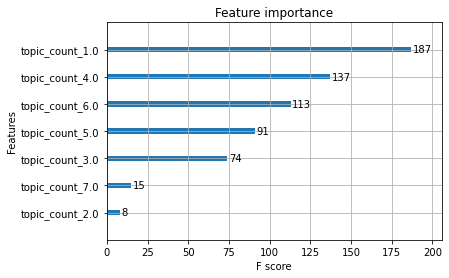

In [25]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_model)
plt.show()

## catboost

In [26]:
from catboost import CatBoostClassifier

In [27]:
cat_model = CatBoostClassifier(n_estimators = 1000, learning_rate =0.05)

In [28]:
score = cross_val_score(cat_model, X_train, y_train, cv = stf, scoring = 'f1_micro')

0:	learn: 0.6688013	total: 56.9ms	remaining: 56.8s
1:	learn: 0.6430296	total: 58ms	remaining: 28.9s
2:	learn: 0.6214304	total: 59.1ms	remaining: 19.6s
3:	learn: 0.6019788	total: 60ms	remaining: 14.9s
4:	learn: 0.5729275	total: 60.8ms	remaining: 12.1s
5:	learn: 0.5457059	total: 61.5ms	remaining: 10.2s
6:	learn: 0.5220128	total: 62.4ms	remaining: 8.86s
7:	learn: 0.4996360	total: 63.1ms	remaining: 7.83s
8:	learn: 0.4783588	total: 64ms	remaining: 7.04s
9:	learn: 0.4534637	total: 64.8ms	remaining: 6.42s
10:	learn: 0.4343054	total: 66.5ms	remaining: 5.97s
11:	learn: 0.4199352	total: 67.4ms	remaining: 5.55s
12:	learn: 0.4018964	total: 68.5ms	remaining: 5.2s
13:	learn: 0.3908961	total: 69.4ms	remaining: 4.89s
14:	learn: 0.3781000	total: 70.2ms	remaining: 4.61s
15:	learn: 0.3629338	total: 70.9ms	remaining: 4.36s
16:	learn: 0.3503050	total: 71.8ms	remaining: 4.15s
17:	learn: 0.3303971	total: 72.5ms	remaining: 3.96s
18:	learn: 0.3162503	total: 73.3ms	remaining: 3.79s
19:	learn: 0.3092043	total: 7

185:	learn: 0.0183402	total: 191ms	remaining: 838ms
186:	learn: 0.0181735	total: 192ms	remaining: 836ms
187:	learn: 0.0180100	total: 193ms	remaining: 833ms
188:	learn: 0.0178495	total: 193ms	remaining: 830ms
189:	learn: 0.0176920	total: 194ms	remaining: 827ms
190:	learn: 0.0175374	total: 195ms	remaining: 825ms
191:	learn: 0.0173856	total: 195ms	remaining: 822ms
192:	learn: 0.0172366	total: 196ms	remaining: 819ms
193:	learn: 0.0170965	total: 197ms	remaining: 817ms
194:	learn: 0.0169589	total: 197ms	remaining: 814ms
195:	learn: 0.0168237	total: 198ms	remaining: 811ms
196:	learn: 0.0166908	total: 198ms	remaining: 809ms
197:	learn: 0.0165601	total: 199ms	remaining: 807ms
198:	learn: 0.0164316	total: 200ms	remaining: 804ms
199:	learn: 0.0163052	total: 200ms	remaining: 802ms
200:	learn: 0.0161809	total: 201ms	remaining: 799ms
201:	learn: 0.0160586	total: 202ms	remaining: 796ms
202:	learn: 0.0159383	total: 202ms	remaining: 794ms
203:	learn: 0.0158199	total: 203ms	remaining: 792ms
204:	learn: 

372:	learn: 0.0070207	total: 327ms	remaining: 549ms
373:	learn: 0.0069981	total: 327ms	remaining: 548ms
374:	learn: 0.0069791	total: 328ms	remaining: 547ms
375:	learn: 0.0069525	total: 329ms	remaining: 546ms
376:	learn: 0.0069261	total: 329ms	remaining: 544ms
377:	learn: 0.0069075	total: 330ms	remaining: 543ms
378:	learn: 0.0068815	total: 331ms	remaining: 542ms
379:	learn: 0.0068631	total: 331ms	remaining: 540ms
380:	learn: 0.0068374	total: 332ms	remaining: 539ms
381:	learn: 0.0068160	total: 332ms	remaining: 538ms
382:	learn: 0.0067980	total: 333ms	remaining: 537ms
383:	learn: 0.0067727	total: 334ms	remaining: 536ms
384:	learn: 0.0067477	total: 336ms	remaining: 536ms
385:	learn: 0.0067300	total: 336ms	remaining: 535ms
386:	learn: 0.0067092	total: 337ms	remaining: 534ms
387:	learn: 0.0066846	total: 338ms	remaining: 533ms
388:	learn: 0.0066673	total: 339ms	remaining: 532ms
389:	learn: 0.0066430	total: 340ms	remaining: 531ms
390:	learn: 0.0066259	total: 340ms	remaining: 530ms
391:	learn: 

564:	learn: 0.0042732	total: 461ms	remaining: 355ms
565:	learn: 0.0042632	total: 462ms	remaining: 354ms
566:	learn: 0.0042548	total: 462ms	remaining: 353ms
567:	learn: 0.0042477	total: 463ms	remaining: 352ms
568:	learn: 0.0042377	total: 464ms	remaining: 351ms
569:	learn: 0.0042307	total: 465ms	remaining: 350ms
570:	learn: 0.0042208	total: 465ms	remaining: 350ms
571:	learn: 0.0042126	total: 466ms	remaining: 349ms
572:	learn: 0.0042028	total: 467ms	remaining: 348ms
573:	learn: 0.0041959	total: 468ms	remaining: 347ms
574:	learn: 0.0041862	total: 468ms	remaining: 346ms
575:	learn: 0.0041793	total: 469ms	remaining: 345ms
576:	learn: 0.0041697	total: 469ms	remaining: 344ms
577:	learn: 0.0041628	total: 470ms	remaining: 343ms
578:	learn: 0.0041533	total: 471ms	remaining: 342ms
579:	learn: 0.0041454	total: 471ms	remaining: 341ms
580:	learn: 0.0041359	total: 472ms	remaining: 340ms
581:	learn: 0.0041292	total: 473ms	remaining: 339ms
582:	learn: 0.0041198	total: 473ms	remaining: 339ms
583:	learn: 

752:	learn: 0.0030829	total: 595ms	remaining: 195ms
753:	learn: 0.0030777	total: 596ms	remaining: 194ms
754:	learn: 0.0030739	total: 597ms	remaining: 194ms
755:	learn: 0.0030687	total: 598ms	remaining: 193ms
756:	learn: 0.0030649	total: 598ms	remaining: 192ms
757:	learn: 0.0030598	total: 599ms	remaining: 191ms
758:	learn: 0.0030554	total: 600ms	remaining: 190ms
759:	learn: 0.0030517	total: 600ms	remaining: 190ms
760:	learn: 0.0030466	total: 601ms	remaining: 189ms
761:	learn: 0.0030415	total: 602ms	remaining: 188ms
762:	learn: 0.0030378	total: 602ms	remaining: 187ms
763:	learn: 0.0030335	total: 603ms	remaining: 186ms
764:	learn: 0.0030284	total: 603ms	remaining: 185ms
765:	learn: 0.0030248	total: 604ms	remaining: 185ms
766:	learn: 0.0030198	total: 605ms	remaining: 184ms
767:	learn: 0.0030161	total: 605ms	remaining: 183ms
768:	learn: 0.0030111	total: 606ms	remaining: 182ms
769:	learn: 0.0030069	total: 607ms	remaining: 181ms
770:	learn: 0.0030033	total: 608ms	remaining: 181ms
771:	learn: 

952:	learn: 0.0023763	total: 734ms	remaining: 36.2ms
953:	learn: 0.0023732	total: 734ms	remaining: 35.4ms
954:	learn: 0.0023706	total: 735ms	remaining: 34.6ms
955:	learn: 0.0023684	total: 736ms	remaining: 33.9ms
956:	learn: 0.0023653	total: 736ms	remaining: 33.1ms
957:	learn: 0.0023622	total: 737ms	remaining: 32.3ms
958:	learn: 0.0023599	total: 737ms	remaining: 31.5ms
959:	learn: 0.0023569	total: 738ms	remaining: 30.8ms
960:	learn: 0.0023547	total: 739ms	remaining: 30ms
961:	learn: 0.0023521	total: 740ms	remaining: 29.2ms
962:	learn: 0.0023490	total: 740ms	remaining: 28.4ms
963:	learn: 0.0023468	total: 741ms	remaining: 27.7ms
964:	learn: 0.0023438	total: 741ms	remaining: 26.9ms
965:	learn: 0.0023412	total: 742ms	remaining: 26.1ms
966:	learn: 0.0023391	total: 743ms	remaining: 25.3ms
967:	learn: 0.0023360	total: 743ms	remaining: 24.6ms
968:	learn: 0.0023330	total: 744ms	remaining: 23.8ms
969:	learn: 0.0023308	total: 745ms	remaining: 23ms
970:	learn: 0.0023278	total: 745ms	remaining: 22.3

119:	learn: 0.0419971	total: 82.5ms	remaining: 605ms
120:	learn: 0.0413382	total: 83.1ms	remaining: 604ms
121:	learn: 0.0407665	total: 83.8ms	remaining: 603ms
122:	learn: 0.0403585	total: 84.4ms	remaining: 602ms
123:	learn: 0.0399103	total: 85ms	remaining: 600ms
124:	learn: 0.0393576	total: 85.6ms	remaining: 599ms
125:	learn: 0.0389595	total: 86.2ms	remaining: 598ms
126:	learn: 0.0385135	total: 86.8ms	remaining: 597ms
127:	learn: 0.0380984	total: 87.4ms	remaining: 596ms
128:	learn: 0.0377018	total: 88ms	remaining: 594ms
129:	learn: 0.0373142	total: 88.6ms	remaining: 593ms
130:	learn: 0.0369158	total: 89.4ms	remaining: 593ms
131:	learn: 0.0365434	total: 90.1ms	remaining: 593ms
132:	learn: 0.0362062	total: 90.8ms	remaining: 592ms
133:	learn: 0.0358727	total: 91.4ms	remaining: 591ms
134:	learn: 0.0354834	total: 92.1ms	remaining: 590ms
135:	learn: 0.0351551	total: 92.8ms	remaining: 590ms
136:	learn: 0.0348128	total: 93.5ms	remaining: 589ms
137:	learn: 0.0344649	total: 94.1ms	remaining: 588

334:	learn: 0.0118164	total: 223ms	remaining: 442ms
335:	learn: 0.0117781	total: 223ms	remaining: 441ms
336:	learn: 0.0117386	total: 224ms	remaining: 440ms
337:	learn: 0.0117008	total: 224ms	remaining: 440ms
338:	learn: 0.0116633	total: 225ms	remaining: 439ms
339:	learn: 0.0116245	total: 226ms	remaining: 438ms
340:	learn: 0.0115875	total: 226ms	remaining: 437ms
341:	learn: 0.0115508	total: 227ms	remaining: 437ms
342:	learn: 0.0115127	total: 228ms	remaining: 437ms
343:	learn: 0.0114764	total: 229ms	remaining: 436ms
344:	learn: 0.0114404	total: 229ms	remaining: 435ms
345:	learn: 0.0114030	total: 230ms	remaining: 434ms
346:	learn: 0.0113674	total: 230ms	remaining: 434ms
347:	learn: 0.0113320	total: 231ms	remaining: 433ms
348:	learn: 0.0112954	total: 232ms	remaining: 432ms
349:	learn: 0.0112605	total: 232ms	remaining: 432ms
350:	learn: 0.0112258	total: 233ms	remaining: 431ms
351:	learn: 0.0111898	total: 234ms	remaining: 430ms
352:	learn: 0.0111555	total: 234ms	remaining: 430ms
353:	learn: 

527:	learn: 0.0072211	total: 356ms	remaining: 319ms
528:	learn: 0.0072061	total: 357ms	remaining: 318ms
529:	learn: 0.0071919	total: 358ms	remaining: 317ms
530:	learn: 0.0071770	total: 359ms	remaining: 317ms
531:	learn: 0.0071629	total: 359ms	remaining: 316ms
532:	learn: 0.0071482	total: 360ms	remaining: 316ms
533:	learn: 0.0071342	total: 361ms	remaining: 315ms
534:	learn: 0.0071196	total: 361ms	remaining: 314ms
535:	learn: 0.0071057	total: 362ms	remaining: 313ms
536:	learn: 0.0070919	total: 363ms	remaining: 313ms
537:	learn: 0.0070775	total: 364ms	remaining: 312ms
538:	learn: 0.0070638	total: 364ms	remaining: 312ms
539:	learn: 0.0070494	total: 365ms	remaining: 311ms
540:	learn: 0.0070359	total: 366ms	remaining: 311ms
541:	learn: 0.0070216	total: 367ms	remaining: 310ms
542:	learn: 0.0070082	total: 368ms	remaining: 310ms
543:	learn: 0.0069947	total: 369ms	remaining: 309ms
544:	learn: 0.0069807	total: 370ms	remaining: 309ms
545:	learn: 0.0069674	total: 371ms	remaining: 308ms
546:	learn: 

703:	learn: 0.0053289	total: 491ms	remaining: 206ms
704:	learn: 0.0053212	total: 492ms	remaining: 206ms
705:	learn: 0.0053129	total: 492ms	remaining: 205ms
706:	learn: 0.0053052	total: 493ms	remaining: 204ms
707:	learn: 0.0052976	total: 494ms	remaining: 204ms
708:	learn: 0.0052899	total: 494ms	remaining: 203ms
709:	learn: 0.0052823	total: 495ms	remaining: 202ms
710:	learn: 0.0052747	total: 496ms	remaining: 201ms
711:	learn: 0.0052666	total: 496ms	remaining: 201ms
712:	learn: 0.0052590	total: 497ms	remaining: 200ms
713:	learn: 0.0052515	total: 497ms	remaining: 199ms
714:	learn: 0.0052440	total: 498ms	remaining: 199ms
715:	learn: 0.0052365	total: 499ms	remaining: 198ms
716:	learn: 0.0052290	total: 499ms	remaining: 197ms
717:	learn: 0.0052211	total: 500ms	remaining: 196ms
718:	learn: 0.0052136	total: 501ms	remaining: 196ms
719:	learn: 0.0052062	total: 502ms	remaining: 195ms
720:	learn: 0.0051989	total: 503ms	remaining: 194ms
721:	learn: 0.0051915	total: 503ms	remaining: 194ms
722:	learn: 

898:	learn: 0.0041414	total: 626ms	remaining: 70.3ms
899:	learn: 0.0041363	total: 626ms	remaining: 69.6ms
900:	learn: 0.0041312	total: 627ms	remaining: 68.9ms
901:	learn: 0.0041266	total: 628ms	remaining: 68.2ms
902:	learn: 0.0041216	total: 628ms	remaining: 67.5ms
903:	learn: 0.0041170	total: 629ms	remaining: 66.8ms
904:	learn: 0.0041124	total: 630ms	remaining: 66.1ms
905:	learn: 0.0041079	total: 631ms	remaining: 65.4ms
906:	learn: 0.0041033	total: 631ms	remaining: 64.7ms
907:	learn: 0.0040987	total: 632ms	remaining: 64ms
908:	learn: 0.0040942	total: 633ms	remaining: 63.3ms
909:	learn: 0.0040892	total: 633ms	remaining: 62.6ms
910:	learn: 0.0040843	total: 634ms	remaining: 61.9ms
911:	learn: 0.0040798	total: 635ms	remaining: 61.2ms
912:	learn: 0.0040753	total: 635ms	remaining: 60.5ms
913:	learn: 0.0040708	total: 636ms	remaining: 59.8ms
914:	learn: 0.0040663	total: 636ms	remaining: 59.1ms
915:	learn: 0.0040618	total: 637ms	remaining: 58.4ms
916:	learn: 0.0040574	total: 638ms	remaining: 57

70:	learn: 0.1006130	total: 48.4ms	remaining: 633ms
71:	learn: 0.0989394	total: 48.9ms	remaining: 631ms
72:	learn: 0.0964472	total: 49.6ms	remaining: 630ms
73:	learn: 0.0947612	total: 50.2ms	remaining: 628ms
74:	learn: 0.0910393	total: 50.9ms	remaining: 627ms
75:	learn: 0.0892036	total: 51.6ms	remaining: 628ms
76:	learn: 0.0876238	total: 52.2ms	remaining: 626ms
77:	learn: 0.0863260	total: 52.9ms	remaining: 625ms
78:	learn: 0.0849275	total: 53.5ms	remaining: 624ms
79:	learn: 0.0831981	total: 54.2ms	remaining: 623ms
80:	learn: 0.0823060	total: 54.8ms	remaining: 622ms
81:	learn: 0.0806616	total: 55.4ms	remaining: 620ms
82:	learn: 0.0791735	total: 55.9ms	remaining: 618ms
83:	learn: 0.0775780	total: 56.5ms	remaining: 616ms
84:	learn: 0.0759394	total: 57.2ms	remaining: 616ms
85:	learn: 0.0745328	total: 58ms	remaining: 616ms
86:	learn: 0.0730490	total: 58.6ms	remaining: 615ms
87:	learn: 0.0709367	total: 59.2ms	remaining: 613ms
88:	learn: 0.0697414	total: 59.8ms	remaining: 612ms
89:	learn: 0.0

267:	learn: 0.0124457	total: 188ms	remaining: 514ms
268:	learn: 0.0123791	total: 189ms	remaining: 514ms
269:	learn: 0.0123134	total: 190ms	remaining: 513ms
270:	learn: 0.0122485	total: 190ms	remaining: 512ms
271:	learn: 0.0122076	total: 191ms	remaining: 512ms
272:	learn: 0.0121439	total: 192ms	remaining: 511ms
273:	learn: 0.0121038	total: 193ms	remaining: 510ms
274:	learn: 0.0120412	total: 193ms	remaining: 510ms
275:	learn: 0.0120018	total: 194ms	remaining: 509ms
276:	learn: 0.0119628	total: 195ms	remaining: 508ms
277:	learn: 0.0119017	total: 195ms	remaining: 507ms
278:	learn: 0.0118635	total: 196ms	remaining: 507ms
279:	learn: 0.0118035	total: 197ms	remaining: 506ms
280:	learn: 0.0117659	total: 197ms	remaining: 505ms
281:	learn: 0.0117069	total: 198ms	remaining: 505ms
282:	learn: 0.0116700	total: 200ms	remaining: 506ms
283:	learn: 0.0116335	total: 201ms	remaining: 506ms
284:	learn: 0.0115759	total: 201ms	remaining: 505ms
285:	learn: 0.0115400	total: 202ms	remaining: 504ms
286:	learn: 

437:	learn: 0.0074654	total: 322ms	remaining: 413ms
438:	learn: 0.0074413	total: 322ms	remaining: 412ms
439:	learn: 0.0074274	total: 323ms	remaining: 411ms
440:	learn: 0.0074139	total: 324ms	remaining: 411ms
441:	learn: 0.0073902	total: 325ms	remaining: 410ms
442:	learn: 0.0073765	total: 325ms	remaining: 409ms
443:	learn: 0.0073632	total: 326ms	remaining: 408ms
444:	learn: 0.0073398	total: 327ms	remaining: 408ms
445:	learn: 0.0073266	total: 327ms	remaining: 407ms
446:	learn: 0.0073132	total: 328ms	remaining: 406ms
447:	learn: 0.0072901	total: 329ms	remaining: 405ms
448:	learn: 0.0072771	total: 329ms	remaining: 404ms
449:	learn: 0.0072639	total: 330ms	remaining: 403ms
450:	learn: 0.0072410	total: 331ms	remaining: 402ms
451:	learn: 0.0072282	total: 331ms	remaining: 402ms
452:	learn: 0.0072152	total: 332ms	remaining: 401ms
453:	learn: 0.0072025	total: 333ms	remaining: 400ms
454:	learn: 0.0071801	total: 334ms	remaining: 400ms
455:	learn: 0.0071672	total: 335ms	remaining: 399ms
456:	learn: 

636:	learn: 0.0051037	total: 459ms	remaining: 262ms
637:	learn: 0.0050962	total: 460ms	remaining: 261ms
638:	learn: 0.0050900	total: 461ms	remaining: 260ms
639:	learn: 0.0050786	total: 461ms	remaining: 260ms
640:	learn: 0.0050723	total: 462ms	remaining: 259ms
641:	learn: 0.0050649	total: 463ms	remaining: 258ms
642:	learn: 0.0050536	total: 463ms	remaining: 257ms
643:	learn: 0.0050474	total: 464ms	remaining: 257ms
644:	learn: 0.0050413	total: 465ms	remaining: 256ms
645:	learn: 0.0050339	total: 466ms	remaining: 255ms
646:	learn: 0.0050228	total: 466ms	remaining: 254ms
647:	learn: 0.0050167	total: 467ms	remaining: 254ms
648:	learn: 0.0050088	total: 468ms	remaining: 253ms
649:	learn: 0.0049978	total: 468ms	remaining: 252ms
650:	learn: 0.0049917	total: 469ms	remaining: 252ms
651:	learn: 0.0049857	total: 470ms	remaining: 251ms
652:	learn: 0.0049748	total: 470ms	remaining: 250ms
653:	learn: 0.0049688	total: 471ms	remaining: 249ms
654:	learn: 0.0049616	total: 472ms	remaining: 249ms
655:	learn: 

834:	learn: 0.0038801	total: 599ms	remaining: 118ms
835:	learn: 0.0038734	total: 600ms	remaining: 118ms
836:	learn: 0.0038698	total: 600ms	remaining: 117ms
837:	learn: 0.0038651	total: 601ms	remaining: 116ms
838:	learn: 0.0038585	total: 602ms	remaining: 115ms
839:	learn: 0.0038549	total: 603ms	remaining: 115ms
840:	learn: 0.0038513	total: 603ms	remaining: 114ms
841:	learn: 0.0038447	total: 604ms	remaining: 113ms
842:	learn: 0.0038412	total: 605ms	remaining: 113ms
843:	learn: 0.0038376	total: 605ms	remaining: 112ms
844:	learn: 0.0038335	total: 606ms	remaining: 111ms
845:	learn: 0.0038269	total: 606ms	remaining: 110ms
846:	learn: 0.0038234	total: 607ms	remaining: 110ms
847:	learn: 0.0038199	total: 608ms	remaining: 109ms
848:	learn: 0.0038134	total: 608ms	remaining: 108ms
849:	learn: 0.0038093	total: 609ms	remaining: 107ms
850:	learn: 0.0038058	total: 610ms	remaining: 107ms
851:	learn: 0.0037993	total: 610ms	remaining: 106ms
852:	learn: 0.0037948	total: 611ms	remaining: 105ms
853:	learn: 

1:	learn: 0.6450553	total: 1.5ms	remaining: 749ms
2:	learn: 0.6179453	total: 2.17ms	remaining: 722ms
3:	learn: 0.5919518	total: 2.9ms	remaining: 722ms
4:	learn: 0.5640691	total: 3.51ms	remaining: 698ms
5:	learn: 0.5378894	total: 4.1ms	remaining: 679ms
6:	learn: 0.5205908	total: 4.78ms	remaining: 678ms
7:	learn: 0.5014206	total: 5.46ms	remaining: 677ms
8:	learn: 0.4854634	total: 6.13ms	remaining: 675ms
9:	learn: 0.4597236	total: 6.82ms	remaining: 675ms
10:	learn: 0.4404954	total: 7.49ms	remaining: 674ms
11:	learn: 0.4272479	total: 8.2ms	remaining: 675ms
12:	learn: 0.4170936	total: 8.88ms	remaining: 674ms
13:	learn: 0.4007761	total: 9.47ms	remaining: 667ms
14:	learn: 0.3866930	total: 10.3ms	remaining: 677ms
15:	learn: 0.3711295	total: 11ms	remaining: 678ms
16:	learn: 0.3598442	total: 11.8ms	remaining: 680ms
17:	learn: 0.3504329	total: 12.4ms	remaining: 674ms
18:	learn: 0.3409371	total: 13ms	remaining: 671ms
19:	learn: 0.3285189	total: 13.6ms	remaining: 666ms
20:	learn: 0.3203857	total: 1

191:	learn: 0.0187237	total: 135ms	remaining: 566ms
192:	learn: 0.0186136	total: 135ms	remaining: 566ms
193:	learn: 0.0185050	total: 136ms	remaining: 566ms
194:	learn: 0.0183977	total: 137ms	remaining: 565ms
195:	learn: 0.0182917	total: 138ms	remaining: 564ms
196:	learn: 0.0181869	total: 138ms	remaining: 563ms
197:	learn: 0.0180831	total: 139ms	remaining: 562ms
198:	learn: 0.0179806	total: 139ms	remaining: 561ms
199:	learn: 0.0178792	total: 140ms	remaining: 561ms
200:	learn: 0.0177791	total: 141ms	remaining: 560ms
201:	learn: 0.0176800	total: 141ms	remaining: 559ms
202:	learn: 0.0175820	total: 142ms	remaining: 558ms
203:	learn: 0.0174765	total: 143ms	remaining: 558ms
204:	learn: 0.0173808	total: 144ms	remaining: 558ms
205:	learn: 0.0172863	total: 145ms	remaining: 557ms
206:	learn: 0.0171927	total: 145ms	remaining: 556ms
207:	learn: 0.0171004	total: 146ms	remaining: 557ms
208:	learn: 0.0170088	total: 147ms	remaining: 556ms
209:	learn: 0.0169182	total: 148ms	remaining: 555ms
210:	learn: 

357:	learn: 0.0094916	total: 267ms	remaining: 479ms
358:	learn: 0.0094637	total: 268ms	remaining: 478ms
359:	learn: 0.0094359	total: 269ms	remaining: 477ms
360:	learn: 0.0094083	total: 269ms	remaining: 477ms
361:	learn: 0.0093809	total: 270ms	remaining: 476ms
362:	learn: 0.0093536	total: 271ms	remaining: 475ms
363:	learn: 0.0093264	total: 272ms	remaining: 475ms
364:	learn: 0.0092995	total: 273ms	remaining: 476ms
365:	learn: 0.0092727	total: 274ms	remaining: 475ms
366:	learn: 0.0092460	total: 276ms	remaining: 475ms
367:	learn: 0.0092195	total: 276ms	remaining: 474ms
368:	learn: 0.0091932	total: 277ms	remaining: 474ms
369:	learn: 0.0091670	total: 278ms	remaining: 473ms
370:	learn: 0.0091409	total: 278ms	remaining: 472ms
371:	learn: 0.0091150	total: 280ms	remaining: 473ms
372:	learn: 0.0090893	total: 281ms	remaining: 472ms
373:	learn: 0.0090637	total: 282ms	remaining: 471ms
374:	learn: 0.0090382	total: 283ms	remaining: 471ms
375:	learn: 0.0090129	total: 283ms	remaining: 470ms
376:	learn: 

710:	learn: 0.0046611	total: 537ms	remaining: 218ms
711:	learn: 0.0046546	total: 538ms	remaining: 218ms
712:	learn: 0.0046481	total: 538ms	remaining: 217ms
713:	learn: 0.0046416	total: 539ms	remaining: 216ms
714:	learn: 0.0046352	total: 540ms	remaining: 215ms
715:	learn: 0.0046287	total: 540ms	remaining: 214ms
716:	learn: 0.0046223	total: 541ms	remaining: 213ms
717:	learn: 0.0046159	total: 541ms	remaining: 213ms
718:	learn: 0.0046095	total: 542ms	remaining: 212ms
719:	learn: 0.0046032	total: 543ms	remaining: 211ms
720:	learn: 0.0045968	total: 543ms	remaining: 210ms
721:	learn: 0.0045905	total: 544ms	remaining: 209ms
722:	learn: 0.0045841	total: 545ms	remaining: 209ms
723:	learn: 0.0045778	total: 545ms	remaining: 208ms
724:	learn: 0.0045716	total: 546ms	remaining: 207ms
725:	learn: 0.0045653	total: 547ms	remaining: 206ms
726:	learn: 0.0045591	total: 547ms	remaining: 205ms
727:	learn: 0.0045528	total: 548ms	remaining: 205ms
728:	learn: 0.0045466	total: 549ms	remaining: 204ms
729:	learn: 

915:	learn: 0.0036244	total: 676ms	remaining: 62ms
916:	learn: 0.0036205	total: 676ms	remaining: 61.2ms
917:	learn: 0.0036166	total: 677ms	remaining: 60.5ms
918:	learn: 0.0036126	total: 678ms	remaining: 59.7ms
919:	learn: 0.0036088	total: 678ms	remaining: 59ms
920:	learn: 0.0036049	total: 679ms	remaining: 58.3ms
921:	learn: 0.0036010	total: 680ms	remaining: 57.5ms
922:	learn: 0.0035971	total: 680ms	remaining: 56.8ms
923:	learn: 0.0035933	total: 681ms	remaining: 56ms
924:	learn: 0.0035894	total: 682ms	remaining: 55.3ms
925:	learn: 0.0035856	total: 682ms	remaining: 54.5ms
926:	learn: 0.0035817	total: 683ms	remaining: 53.8ms
927:	learn: 0.0035779	total: 684ms	remaining: 53.1ms
928:	learn: 0.0035741	total: 685ms	remaining: 52.4ms
929:	learn: 0.0035703	total: 687ms	remaining: 51.7ms
930:	learn: 0.0035665	total: 687ms	remaining: 50.9ms
931:	learn: 0.0035627	total: 688ms	remaining: 50.2ms
932:	learn: 0.0035589	total: 689ms	remaining: 49.5ms
933:	learn: 0.0035551	total: 690ms	remaining: 48.7ms

272:	learn: 0.0145242	total: 184ms	remaining: 489ms
273:	learn: 0.0144591	total: 184ms	remaining: 488ms
274:	learn: 0.0143946	total: 185ms	remaining: 487ms
275:	learn: 0.0143307	total: 186ms	remaining: 487ms
276:	learn: 0.0142673	total: 186ms	remaining: 486ms
277:	learn: 0.0142045	total: 187ms	remaining: 486ms
278:	learn: 0.0141423	total: 188ms	remaining: 485ms
279:	learn: 0.0140806	total: 188ms	remaining: 485ms
280:	learn: 0.0140194	total: 189ms	remaining: 484ms
281:	learn: 0.0139588	total: 190ms	remaining: 483ms
282:	learn: 0.0138987	total: 190ms	remaining: 482ms
283:	learn: 0.0138391	total: 191ms	remaining: 481ms
284:	learn: 0.0137800	total: 192ms	remaining: 481ms
285:	learn: 0.0137214	total: 192ms	remaining: 480ms
286:	learn: 0.0136634	total: 193ms	remaining: 479ms
287:	learn: 0.0136058	total: 194ms	remaining: 479ms
288:	learn: 0.0135487	total: 194ms	remaining: 478ms
289:	learn: 0.0134747	total: 195ms	remaining: 477ms
290:	learn: 0.0134187	total: 196ms	remaining: 477ms
291:	learn: 

476:	learn: 0.0073909	total: 323ms	remaining: 354ms
477:	learn: 0.0073739	total: 323ms	remaining: 353ms
478:	learn: 0.0073571	total: 324ms	remaining: 352ms
479:	learn: 0.0073403	total: 325ms	remaining: 352ms
480:	learn: 0.0073236	total: 326ms	remaining: 351ms
481:	learn: 0.0073020	total: 326ms	remaining: 351ms
482:	learn: 0.0072855	total: 327ms	remaining: 350ms
483:	learn: 0.0072690	total: 328ms	remaining: 350ms
484:	learn: 0.0072527	total: 329ms	remaining: 349ms
485:	learn: 0.0072364	total: 329ms	remaining: 348ms
486:	learn: 0.0072165	total: 330ms	remaining: 348ms
487:	learn: 0.0072003	total: 331ms	remaining: 347ms
488:	learn: 0.0071843	total: 331ms	remaining: 346ms
489:	learn: 0.0071683	total: 332ms	remaining: 346ms
490:	learn: 0.0071523	total: 333ms	remaining: 345ms
491:	learn: 0.0071329	total: 333ms	remaining: 344ms
492:	learn: 0.0071171	total: 334ms	remaining: 344ms
493:	learn: 0.0071014	total: 335ms	remaining: 343ms
494:	learn: 0.0070858	total: 336ms	remaining: 343ms
495:	learn: 

677:	learn: 0.0049811	total: 463ms	remaining: 220ms
678:	learn: 0.0049711	total: 463ms	remaining: 219ms
679:	learn: 0.0049634	total: 464ms	remaining: 218ms
680:	learn: 0.0049557	total: 465ms	remaining: 218ms
681:	learn: 0.0049481	total: 465ms	remaining: 217ms
682:	learn: 0.0049405	total: 466ms	remaining: 216ms
683:	learn: 0.0049329	total: 466ms	remaining: 215ms
684:	learn: 0.0049236	total: 467ms	remaining: 215ms
685:	learn: 0.0049161	total: 468ms	remaining: 214ms
686:	learn: 0.0049086	total: 468ms	remaining: 213ms
687:	learn: 0.0049011	total: 469ms	remaining: 213ms
688:	learn: 0.0048936	total: 470ms	remaining: 212ms
689:	learn: 0.0048839	total: 470ms	remaining: 211ms
690:	learn: 0.0048765	total: 471ms	remaining: 210ms
691:	learn: 0.0048691	total: 471ms	remaining: 210ms
692:	learn: 0.0048617	total: 472ms	remaining: 209ms
693:	learn: 0.0048544	total: 473ms	remaining: 208ms
694:	learn: 0.0048470	total: 473ms	remaining: 208ms
695:	learn: 0.0048381	total: 474ms	remaining: 207ms
696:	learn: 

869:	learn: 0.0038137	total: 597ms	remaining: 89.2ms
870:	learn: 0.0038091	total: 597ms	remaining: 88.5ms
871:	learn: 0.0038043	total: 598ms	remaining: 87.8ms
872:	learn: 0.0037998	total: 599ms	remaining: 87.1ms
873:	learn: 0.0037953	total: 600ms	remaining: 86.4ms
874:	learn: 0.0037905	total: 600ms	remaining: 85.7ms
875:	learn: 0.0037860	total: 601ms	remaining: 85.1ms
876:	learn: 0.0037816	total: 602ms	remaining: 84.4ms
877:	learn: 0.0037771	total: 602ms	remaining: 83.7ms
878:	learn: 0.0037723	total: 604ms	remaining: 83.1ms
879:	learn: 0.0037679	total: 604ms	remaining: 82.4ms
880:	learn: 0.0037635	total: 605ms	remaining: 81.7ms
881:	learn: 0.0037585	total: 606ms	remaining: 81.1ms
882:	learn: 0.0037541	total: 607ms	remaining: 80.4ms
883:	learn: 0.0037497	total: 607ms	remaining: 79.7ms
884:	learn: 0.0037453	total: 608ms	remaining: 79ms
885:	learn: 0.0037407	total: 608ms	remaining: 78.3ms
886:	learn: 0.0037363	total: 609ms	remaining: 77.6ms
887:	learn: 0.0037319	total: 610ms	remaining: 76

217:	learn: 0.0149272	total: 152ms	remaining: 545ms
218:	learn: 0.0148414	total: 152ms	remaining: 544ms
219:	learn: 0.0147566	total: 153ms	remaining: 543ms
220:	learn: 0.0146728	total: 154ms	remaining: 542ms
221:	learn: 0.0145898	total: 154ms	remaining: 541ms
222:	learn: 0.0145078	total: 155ms	remaining: 540ms
223:	learn: 0.0144267	total: 156ms	remaining: 540ms
224:	learn: 0.0143465	total: 156ms	remaining: 539ms
225:	learn: 0.0142671	total: 157ms	remaining: 538ms
226:	learn: 0.0141886	total: 158ms	remaining: 537ms
227:	learn: 0.0141110	total: 158ms	remaining: 537ms
228:	learn: 0.0140342	total: 159ms	remaining: 536ms
229:	learn: 0.0139582	total: 160ms	remaining: 535ms
230:	learn: 0.0138830	total: 160ms	remaining: 534ms
231:	learn: 0.0138086	total: 161ms	remaining: 533ms
232:	learn: 0.0137349	total: 162ms	remaining: 533ms
233:	learn: 0.0136621	total: 163ms	remaining: 533ms
234:	learn: 0.0135900	total: 164ms	remaining: 532ms
235:	learn: 0.0135186	total: 164ms	remaining: 532ms
236:	learn: 

413:	learn: 0.0076756	total: 289ms	remaining: 410ms
414:	learn: 0.0076595	total: 290ms	remaining: 409ms
415:	learn: 0.0076434	total: 291ms	remaining: 408ms
416:	learn: 0.0076274	total: 292ms	remaining: 408ms
417:	learn: 0.0076114	total: 292ms	remaining: 407ms
418:	learn: 0.0075955	total: 293ms	remaining: 406ms
419:	learn: 0.0075797	total: 294ms	remaining: 405ms
420:	learn: 0.0075640	total: 294ms	remaining: 405ms
421:	learn: 0.0075483	total: 295ms	remaining: 404ms
422:	learn: 0.0075327	total: 296ms	remaining: 403ms
423:	learn: 0.0075171	total: 296ms	remaining: 402ms
424:	learn: 0.0075017	total: 297ms	remaining: 402ms
425:	learn: 0.0074862	total: 298ms	remaining: 401ms
426:	learn: 0.0074709	total: 298ms	remaining: 400ms
427:	learn: 0.0074556	total: 299ms	remaining: 400ms
428:	learn: 0.0074404	total: 300ms	remaining: 399ms
429:	learn: 0.0074252	total: 301ms	remaining: 399ms
430:	learn: 0.0074101	total: 301ms	remaining: 398ms
431:	learn: 0.0073951	total: 302ms	remaining: 397ms
432:	learn: 

602:	learn: 0.0055019	total: 425ms	remaining: 280ms
603:	learn: 0.0054937	total: 426ms	remaining: 279ms
604:	learn: 0.0054855	total: 427ms	remaining: 279ms
605:	learn: 0.0054774	total: 427ms	remaining: 278ms
606:	learn: 0.0054693	total: 428ms	remaining: 277ms
607:	learn: 0.0054612	total: 428ms	remaining: 276ms
608:	learn: 0.0054532	total: 429ms	remaining: 276ms
609:	learn: 0.0054451	total: 430ms	remaining: 275ms
610:	learn: 0.0054371	total: 431ms	remaining: 274ms
611:	learn: 0.0054292	total: 432ms	remaining: 274ms
612:	learn: 0.0054212	total: 433ms	remaining: 273ms
613:	learn: 0.0054133	total: 433ms	remaining: 272ms
614:	learn: 0.0054054	total: 434ms	remaining: 272ms
615:	learn: 0.0053975	total: 435ms	remaining: 271ms
616:	learn: 0.0053896	total: 436ms	remaining: 270ms
617:	learn: 0.0053818	total: 436ms	remaining: 270ms
618:	learn: 0.0053739	total: 437ms	remaining: 269ms
619:	learn: 0.0053662	total: 438ms	remaining: 268ms
620:	learn: 0.0053584	total: 438ms	remaining: 268ms
621:	learn: 

794:	learn: 0.0042766	total: 561ms	remaining: 145ms
795:	learn: 0.0042717	total: 562ms	remaining: 144ms
796:	learn: 0.0042668	total: 563ms	remaining: 143ms
797:	learn: 0.0042599	total: 563ms	remaining: 143ms
798:	learn: 0.0042550	total: 564ms	remaining: 142ms
799:	learn: 0.0042502	total: 565ms	remaining: 141ms
800:	learn: 0.0042453	total: 565ms	remaining: 140ms
801:	learn: 0.0042385	total: 566ms	remaining: 140ms
802:	learn: 0.0042336	total: 567ms	remaining: 139ms
803:	learn: 0.0042288	total: 568ms	remaining: 138ms
804:	learn: 0.0042240	total: 568ms	remaining: 138ms
805:	learn: 0.0042172	total: 569ms	remaining: 137ms
806:	learn: 0.0042125	total: 570ms	remaining: 136ms
807:	learn: 0.0042077	total: 570ms	remaining: 136ms
808:	learn: 0.0042030	total: 571ms	remaining: 135ms
809:	learn: 0.0041982	total: 572ms	remaining: 134ms
810:	learn: 0.0041915	total: 572ms	remaining: 133ms
811:	learn: 0.0041868	total: 573ms	remaining: 133ms
812:	learn: 0.0041821	total: 574ms	remaining: 132ms
813:	learn: 

990:	learn: 0.0034289	total: 702ms	remaining: 6.37ms
991:	learn: 0.0034253	total: 702ms	remaining: 5.66ms
992:	learn: 0.0034221	total: 703ms	remaining: 4.96ms
993:	learn: 0.0034190	total: 704ms	remaining: 4.25ms
994:	learn: 0.0034154	total: 704ms	remaining: 3.54ms
995:	learn: 0.0034123	total: 705ms	remaining: 2.83ms
996:	learn: 0.0034086	total: 706ms	remaining: 2.12ms
997:	learn: 0.0034055	total: 706ms	remaining: 1.42ms
998:	learn: 0.0034018	total: 707ms	remaining: 707us
999:	learn: 0.0033982	total: 708ms	remaining: 0us
0:	learn: 0.6545478	total: 1.01ms	remaining: 1s
1:	learn: 0.6309334	total: 1.68ms	remaining: 838ms
2:	learn: 0.6077486	total: 2.45ms	remaining: 814ms
3:	learn: 0.5854647	total: 3.12ms	remaining: 778ms
4:	learn: 0.5606242	total: 3.79ms	remaining: 755ms
5:	learn: 0.5365994	total: 4.41ms	remaining: 730ms
6:	learn: 0.5240989	total: 5.11ms	remaining: 724ms
7:	learn: 0.5104993	total: 5.7ms	remaining: 707ms
8:	learn: 0.4903252	total: 6.42ms	remaining: 707ms
9:	learn: 0.4756955

151:	learn: 0.0317267	total: 107ms	remaining: 596ms
152:	learn: 0.0314158	total: 107ms	remaining: 595ms
153:	learn: 0.0311109	total: 108ms	remaining: 595ms
154:	learn: 0.0308118	total: 109ms	remaining: 594ms
155:	learn: 0.0305684	total: 110ms	remaining: 593ms
156:	learn: 0.0302792	total: 110ms	remaining: 592ms
157:	learn: 0.0300138	total: 111ms	remaining: 592ms
158:	learn: 0.0297621	total: 112ms	remaining: 591ms
159:	learn: 0.0295059	total: 112ms	remaining: 591ms
160:	learn: 0.0292357	total: 113ms	remaining: 590ms
161:	learn: 0.0289883	total: 114ms	remaining: 590ms
162:	learn: 0.0287271	total: 115ms	remaining: 592ms
163:	learn: 0.0285140	total: 116ms	remaining: 592ms
164:	learn: 0.0282609	total: 117ms	remaining: 592ms
165:	learn: 0.0280123	total: 118ms	remaining: 592ms
166:	learn: 0.0277854	total: 119ms	remaining: 592ms
167:	learn: 0.0275611	total: 120ms	remaining: 592ms
168:	learn: 0.0273241	total: 120ms	remaining: 591ms
169:	learn: 0.0271305	total: 121ms	remaining: 592ms
170:	learn: 

337:	learn: 0.0111115	total: 240ms	remaining: 470ms
338:	learn: 0.0110723	total: 240ms	remaining: 469ms
339:	learn: 0.0110335	total: 241ms	remaining: 468ms
340:	learn: 0.0109949	total: 242ms	remaining: 468ms
341:	learn: 0.0109559	total: 243ms	remaining: 467ms
342:	learn: 0.0109179	total: 244ms	remaining: 467ms
343:	learn: 0.0108801	total: 245ms	remaining: 468ms
344:	learn: 0.0108426	total: 246ms	remaining: 467ms
345:	learn: 0.0108053	total: 247ms	remaining: 467ms
346:	learn: 0.0107677	total: 248ms	remaining: 466ms
347:	learn: 0.0107309	total: 248ms	remaining: 465ms
348:	learn: 0.0106944	total: 249ms	remaining: 464ms
349:	learn: 0.0106581	total: 250ms	remaining: 464ms
350:	learn: 0.0106221	total: 250ms	remaining: 463ms
351:	learn: 0.0105863	total: 251ms	remaining: 462ms
352:	learn: 0.0105502	total: 252ms	remaining: 461ms
353:	learn: 0.0105149	total: 253ms	remaining: 461ms
354:	learn: 0.0104798	total: 253ms	remaining: 460ms
355:	learn: 0.0104450	total: 254ms	remaining: 460ms
356:	learn: 

535:	learn: 0.0065219	total: 377ms	remaining: 327ms
536:	learn: 0.0065083	total: 378ms	remaining: 326ms
537:	learn: 0.0064948	total: 379ms	remaining: 325ms
538:	learn: 0.0064814	total: 379ms	remaining: 325ms
539:	learn: 0.0064680	total: 380ms	remaining: 324ms
540:	learn: 0.0064543	total: 381ms	remaining: 323ms
541:	learn: 0.0064410	total: 381ms	remaining: 322ms
542:	learn: 0.0064278	total: 382ms	remaining: 321ms
543:	learn: 0.0064146	total: 383ms	remaining: 321ms
544:	learn: 0.0064015	total: 383ms	remaining: 320ms
545:	learn: 0.0063884	total: 384ms	remaining: 319ms
546:	learn: 0.0063754	total: 385ms	remaining: 319ms
547:	learn: 0.0063624	total: 385ms	remaining: 318ms
548:	learn: 0.0063495	total: 386ms	remaining: 317ms
549:	learn: 0.0063366	total: 387ms	remaining: 316ms
550:	learn: 0.0063235	total: 387ms	remaining: 316ms
551:	learn: 0.0063107	total: 388ms	remaining: 315ms
552:	learn: 0.0062980	total: 389ms	remaining: 314ms
553:	learn: 0.0062854	total: 389ms	remaining: 313ms
554:	learn: 

749:	learn: 0.0045042	total: 520ms	remaining: 173ms
750:	learn: 0.0044977	total: 520ms	remaining: 172ms
751:	learn: 0.0044911	total: 521ms	remaining: 172ms
752:	learn: 0.0044846	total: 521ms	remaining: 171ms
753:	learn: 0.0044782	total: 522ms	remaining: 170ms
754:	learn: 0.0044718	total: 523ms	remaining: 170ms
755:	learn: 0.0044654	total: 523ms	remaining: 169ms
756:	learn: 0.0044590	total: 524ms	remaining: 168ms
757:	learn: 0.0044526	total: 525ms	remaining: 167ms
758:	learn: 0.0044463	total: 525ms	remaining: 167ms
759:	learn: 0.0044400	total: 526ms	remaining: 166ms
760:	learn: 0.0044337	total: 526ms	remaining: 165ms
761:	learn: 0.0044272	total: 527ms	remaining: 165ms
762:	learn: 0.0044209	total: 528ms	remaining: 164ms
763:	learn: 0.0044147	total: 528ms	remaining: 163ms
764:	learn: 0.0044084	total: 529ms	remaining: 162ms
765:	learn: 0.0044022	total: 529ms	remaining: 162ms
766:	learn: 0.0043960	total: 530ms	remaining: 161ms
767:	learn: 0.0043898	total: 531ms	remaining: 160ms
768:	learn: 

963:	learn: 0.0034389	total: 657ms	remaining: 24.5ms
964:	learn: 0.0034351	total: 658ms	remaining: 23.9ms
965:	learn: 0.0034314	total: 659ms	remaining: 23.2ms
966:	learn: 0.0034276	total: 659ms	remaining: 22.5ms
967:	learn: 0.0034238	total: 660ms	remaining: 21.8ms
968:	learn: 0.0034201	total: 660ms	remaining: 21.1ms
969:	learn: 0.0034163	total: 661ms	remaining: 20.4ms
970:	learn: 0.0034128	total: 662ms	remaining: 19.8ms
971:	learn: 0.0034090	total: 663ms	remaining: 19.1ms
972:	learn: 0.0034053	total: 663ms	remaining: 18.4ms
973:	learn: 0.0034016	total: 664ms	remaining: 17.7ms
974:	learn: 0.0033979	total: 664ms	remaining: 17ms
975:	learn: 0.0033942	total: 665ms	remaining: 16.4ms
976:	learn: 0.0033905	total: 666ms	remaining: 15.7ms
977:	learn: 0.0033868	total: 667ms	remaining: 15ms
978:	learn: 0.0033831	total: 667ms	remaining: 14.3ms
979:	learn: 0.0033793	total: 668ms	remaining: 13.6ms
980:	learn: 0.0033757	total: 669ms	remaining: 12.9ms
981:	learn: 0.0033720	total: 669ms	remaining: 12.3

136:	learn: 0.0354221	total: 92.1ms	remaining: 580ms
137:	learn: 0.0350521	total: 92.8ms	remaining: 579ms
138:	learn: 0.0347254	total: 93.4ms	remaining: 579ms
139:	learn: 0.0343994	total: 94.1ms	remaining: 578ms
140:	learn: 0.0340273	total: 94.8ms	remaining: 578ms
141:	learn: 0.0336511	total: 95.4ms	remaining: 577ms
142:	learn: 0.0333160	total: 96.4ms	remaining: 578ms
143:	learn: 0.0329549	total: 97ms	remaining: 577ms
144:	learn: 0.0326651	total: 97.6ms	remaining: 576ms
145:	learn: 0.0323805	total: 98.2ms	remaining: 574ms
146:	learn: 0.0321008	total: 98.8ms	remaining: 573ms
147:	learn: 0.0318260	total: 99.3ms	remaining: 572ms
148:	learn: 0.0314951	total: 100ms	remaining: 571ms
149:	learn: 0.0311645	total: 101ms	remaining: 571ms
150:	learn: 0.0308758	total: 101ms	remaining: 570ms
151:	learn: 0.0305639	total: 102ms	remaining: 569ms
152:	learn: 0.0302582	total: 103ms	remaining: 568ms
153:	learn: 0.0299585	total: 103ms	remaining: 567ms
154:	learn: 0.0297252	total: 104ms	remaining: 567ms
15

344:	learn: 0.0103384	total: 231ms	remaining: 438ms
345:	learn: 0.0103026	total: 232ms	remaining: 438ms
346:	learn: 0.0102671	total: 233ms	remaining: 438ms
347:	learn: 0.0102319	total: 233ms	remaining: 437ms
348:	learn: 0.0101968	total: 234ms	remaining: 436ms
349:	learn: 0.0101620	total: 235ms	remaining: 436ms
350:	learn: 0.0101275	total: 235ms	remaining: 435ms
351:	learn: 0.0100932	total: 236ms	remaining: 434ms
352:	learn: 0.0100591	total: 236ms	remaining: 433ms
353:	learn: 0.0100252	total: 237ms	remaining: 433ms
354:	learn: 0.0099916	total: 238ms	remaining: 432ms
355:	learn: 0.0099582	total: 238ms	remaining: 431ms
356:	learn: 0.0099250	total: 239ms	remaining: 431ms
357:	learn: 0.0098920	total: 240ms	remaining: 430ms
358:	learn: 0.0098592	total: 240ms	remaining: 429ms
359:	learn: 0.0098267	total: 241ms	remaining: 428ms
360:	learn: 0.0097944	total: 242ms	remaining: 428ms
361:	learn: 0.0097622	total: 242ms	remaining: 427ms
362:	learn: 0.0097303	total: 243ms	remaining: 426ms
363:	learn: 

545:	learn: 0.0060678	total: 370ms	remaining: 307ms
546:	learn: 0.0060549	total: 370ms	remaining: 307ms
547:	learn: 0.0060425	total: 371ms	remaining: 306ms
548:	learn: 0.0060302	total: 371ms	remaining: 305ms
549:	learn: 0.0060179	total: 372ms	remaining: 305ms
550:	learn: 0.0060056	total: 373ms	remaining: 304ms
551:	learn: 0.0059934	total: 373ms	remaining: 303ms
552:	learn: 0.0059808	total: 374ms	remaining: 302ms
553:	learn: 0.0059687	total: 375ms	remaining: 302ms
554:	learn: 0.0059567	total: 376ms	remaining: 301ms
555:	learn: 0.0059447	total: 376ms	remaining: 300ms
556:	learn: 0.0059327	total: 377ms	remaining: 300ms
557:	learn: 0.0059208	total: 377ms	remaining: 299ms
558:	learn: 0.0059085	total: 378ms	remaining: 298ms
559:	learn: 0.0058967	total: 379ms	remaining: 298ms
560:	learn: 0.0058849	total: 379ms	remaining: 297ms
561:	learn: 0.0058732	total: 380ms	remaining: 296ms
562:	learn: 0.0058615	total: 381ms	remaining: 296ms
563:	learn: 0.0058499	total: 381ms	remaining: 295ms
564:	learn: 

731:	learn: 0.0043835	total: 503ms	remaining: 184ms
732:	learn: 0.0043770	total: 504ms	remaining: 184ms
733:	learn: 0.0043705	total: 505ms	remaining: 183ms
734:	learn: 0.0043640	total: 506ms	remaining: 182ms
735:	learn: 0.0043576	total: 507ms	remaining: 182ms
736:	learn: 0.0043511	total: 507ms	remaining: 181ms
737:	learn: 0.0043447	total: 508ms	remaining: 180ms
738:	learn: 0.0043383	total: 509ms	remaining: 180ms
739:	learn: 0.0043319	total: 509ms	remaining: 179ms
740:	learn: 0.0043255	total: 510ms	remaining: 178ms
741:	learn: 0.0043192	total: 511ms	remaining: 178ms
742:	learn: 0.0043128	total: 512ms	remaining: 177ms
743:	learn: 0.0043065	total: 513ms	remaining: 177ms
744:	learn: 0.0043002	total: 514ms	remaining: 176ms
745:	learn: 0.0042939	total: 514ms	remaining: 175ms
746:	learn: 0.0042877	total: 515ms	remaining: 174ms
747:	learn: 0.0042814	total: 516ms	remaining: 174ms
748:	learn: 0.0042752	total: 516ms	remaining: 173ms
749:	learn: 0.0042690	total: 517ms	remaining: 172ms
750:	learn: 

928:	learn: 0.0033881	total: 640ms	remaining: 48.9ms
929:	learn: 0.0033842	total: 640ms	remaining: 48.2ms
930:	learn: 0.0033804	total: 641ms	remaining: 47.5ms
931:	learn: 0.0033765	total: 642ms	remaining: 46.8ms
932:	learn: 0.0033726	total: 643ms	remaining: 46.1ms
933:	learn: 0.0033687	total: 643ms	remaining: 45.4ms
934:	learn: 0.0033649	total: 644ms	remaining: 44.8ms
935:	learn: 0.0033610	total: 645ms	remaining: 44.1ms
936:	learn: 0.0033572	total: 645ms	remaining: 43.4ms
937:	learn: 0.0033533	total: 646ms	remaining: 42.7ms
938:	learn: 0.0033495	total: 647ms	remaining: 42ms
939:	learn: 0.0033457	total: 647ms	remaining: 41.3ms
940:	learn: 0.0033419	total: 648ms	remaining: 40.6ms
941:	learn: 0.0033381	total: 649ms	remaining: 40ms
942:	learn: 0.0033343	total: 649ms	remaining: 39.3ms
943:	learn: 0.0033305	total: 650ms	remaining: 38.6ms
944:	learn: 0.0033268	total: 651ms	remaining: 37.9ms
945:	learn: 0.0033230	total: 651ms	remaining: 37.2ms
946:	learn: 0.0033192	total: 652ms	remaining: 36.5

97:	learn: 0.0609771	total: 65.6ms	remaining: 604ms
98:	learn: 0.0597916	total: 66.2ms	remaining: 602ms
99:	learn: 0.0587405	total: 66.8ms	remaining: 601ms
100:	learn: 0.0576245	total: 67.4ms	remaining: 600ms
101:	learn: 0.0564641	total: 68ms	remaining: 598ms
102:	learn: 0.0552176	total: 68.6ms	remaining: 597ms
103:	learn: 0.0544284	total: 69.1ms	remaining: 596ms
104:	learn: 0.0533496	total: 69.8ms	remaining: 595ms
105:	learn: 0.0523212	total: 70.5ms	remaining: 594ms
106:	learn: 0.0515933	total: 71.1ms	remaining: 593ms
107:	learn: 0.0503163	total: 71.7ms	remaining: 592ms
108:	learn: 0.0491496	total: 72.4ms	remaining: 592ms
109:	learn: 0.0484841	total: 73ms	remaining: 590ms
110:	learn: 0.0479760	total: 73.6ms	remaining: 590ms
111:	learn: 0.0470908	total: 74.2ms	remaining: 589ms
112:	learn: 0.0462404	total: 74.9ms	remaining: 588ms
113:	learn: 0.0456019	total: 75.5ms	remaining: 587ms
114:	learn: 0.0450320	total: 76.1ms	remaining: 586ms
115:	learn: 0.0444767	total: 76.8ms	remaining: 585ms


315:	learn: 0.0096138	total: 207ms	remaining: 449ms
316:	learn: 0.0095750	total: 208ms	remaining: 448ms
317:	learn: 0.0095365	total: 209ms	remaining: 447ms
318:	learn: 0.0095034	total: 209ms	remaining: 446ms
319:	learn: 0.0094655	total: 210ms	remaining: 446ms
320:	learn: 0.0094278	total: 210ms	remaining: 445ms
321:	learn: 0.0093905	total: 211ms	remaining: 444ms
322:	learn: 0.0093584	total: 211ms	remaining: 443ms
323:	learn: 0.0093215	total: 212ms	remaining: 442ms
324:	learn: 0.0092850	total: 213ms	remaining: 442ms
325:	learn: 0.0092488	total: 213ms	remaining: 441ms
326:	learn: 0.0092176	total: 214ms	remaining: 441ms
327:	learn: 0.0091819	total: 215ms	remaining: 440ms
328:	learn: 0.0091464	total: 215ms	remaining: 439ms
329:	learn: 0.0091159	total: 216ms	remaining: 438ms
330:	learn: 0.0090810	total: 217ms	remaining: 438ms
331:	learn: 0.0090463	total: 217ms	remaining: 437ms
332:	learn: 0.0090119	total: 218ms	remaining: 436ms
333:	learn: 0.0089822	total: 218ms	remaining: 436ms
334:	learn: 

513:	learn: 0.0054014	total: 345ms	remaining: 326ms
514:	learn: 0.0053890	total: 346ms	remaining: 326ms
515:	learn: 0.0053766	total: 346ms	remaining: 325ms
516:	learn: 0.0053659	total: 347ms	remaining: 324ms
517:	learn: 0.0053536	total: 348ms	remaining: 324ms
518:	learn: 0.0053414	total: 348ms	remaining: 323ms
519:	learn: 0.0053292	total: 349ms	remaining: 322ms
520:	learn: 0.0053187	total: 350ms	remaining: 322ms
521:	learn: 0.0053066	total: 351ms	remaining: 321ms
522:	learn: 0.0052946	total: 352ms	remaining: 321ms
523:	learn: 0.0052842	total: 352ms	remaining: 320ms
524:	learn: 0.0052723	total: 353ms	remaining: 320ms
525:	learn: 0.0052604	total: 354ms	remaining: 319ms
526:	learn: 0.0052486	total: 355ms	remaining: 318ms
527:	learn: 0.0052384	total: 355ms	remaining: 318ms
528:	learn: 0.0052266	total: 356ms	remaining: 317ms
529:	learn: 0.0052150	total: 357ms	remaining: 316ms
530:	learn: 0.0052034	total: 357ms	remaining: 315ms
531:	learn: 0.0051933	total: 358ms	remaining: 315ms
532:	learn: 

717:	learn: 0.0037092	total: 482ms	remaining: 189ms
718:	learn: 0.0037033	total: 482ms	remaining: 189ms
719:	learn: 0.0036974	total: 483ms	remaining: 188ms
720:	learn: 0.0036922	total: 484ms	remaining: 187ms
721:	learn: 0.0036864	total: 484ms	remaining: 186ms
722:	learn: 0.0036806	total: 485ms	remaining: 186ms
723:	learn: 0.0036747	total: 486ms	remaining: 185ms
724:	learn: 0.0036697	total: 487ms	remaining: 185ms
725:	learn: 0.0036639	total: 487ms	remaining: 184ms
726:	learn: 0.0036581	total: 488ms	remaining: 183ms
727:	learn: 0.0036524	total: 488ms	remaining: 183ms
728:	learn: 0.0036474	total: 489ms	remaining: 182ms
729:	learn: 0.0036417	total: 490ms	remaining: 181ms
730:	learn: 0.0036360	total: 491ms	remaining: 181ms
731:	learn: 0.0036303	total: 491ms	remaining: 180ms
732:	learn: 0.0036253	total: 492ms	remaining: 179ms
733:	learn: 0.0036197	total: 493ms	remaining: 179ms
734:	learn: 0.0036141	total: 493ms	remaining: 178ms
735:	learn: 0.0036092	total: 494ms	remaining: 177ms
736:	learn: 

916:	learn: 0.0028372	total: 619ms	remaining: 56ms
917:	learn: 0.0028337	total: 620ms	remaining: 55.3ms
918:	learn: 0.0028303	total: 621ms	remaining: 54.7ms
919:	learn: 0.0028273	total: 621ms	remaining: 54ms
920:	learn: 0.0028238	total: 622ms	remaining: 53.3ms
921:	learn: 0.0028204	total: 623ms	remaining: 52.7ms
922:	learn: 0.0028174	total: 624ms	remaining: 52ms
923:	learn: 0.0028140	total: 624ms	remaining: 51.3ms
924:	learn: 0.0028105	total: 625ms	remaining: 50.7ms
925:	learn: 0.0028071	total: 625ms	remaining: 50ms
926:	learn: 0.0028042	total: 626ms	remaining: 49.3ms
927:	learn: 0.0028008	total: 627ms	remaining: 48.6ms
928:	learn: 0.0027974	total: 627ms	remaining: 47.9ms
929:	learn: 0.0027940	total: 628ms	remaining: 47.3ms
930:	learn: 0.0027911	total: 628ms	remaining: 46.6ms
931:	learn: 0.0027877	total: 629ms	remaining: 45.9ms
932:	learn: 0.0027844	total: 630ms	remaining: 45.2ms
933:	learn: 0.0027810	total: 630ms	remaining: 44.5ms
934:	learn: 0.0027781	total: 631ms	remaining: 43.9ms
9

76:	learn: 0.0874321	total: 54.9ms	remaining: 659ms
77:	learn: 0.0860142	total: 55.8ms	remaining: 659ms
78:	learn: 0.0848140	total: 56.5ms	remaining: 658ms
79:	learn: 0.0833938	total: 57.2ms	remaining: 657ms
80:	learn: 0.0823866	total: 57.8ms	remaining: 656ms
81:	learn: 0.0810860	total: 58.5ms	remaining: 655ms
82:	learn: 0.0790145	total: 59.1ms	remaining: 653ms
83:	learn: 0.0784517	total: 59.9ms	remaining: 653ms
84:	learn: 0.0771925	total: 60.7ms	remaining: 653ms
85:	learn: 0.0746638	total: 61.5ms	remaining: 653ms
86:	learn: 0.0736889	total: 62.1ms	remaining: 652ms
87:	learn: 0.0726198	total: 62.8ms	remaining: 651ms
88:	learn: 0.0716342	total: 63.5ms	remaining: 650ms
89:	learn: 0.0707411	total: 64.3ms	remaining: 650ms
90:	learn: 0.0692364	total: 65.2ms	remaining: 651ms
91:	learn: 0.0675476	total: 65.9ms	remaining: 651ms
92:	learn: 0.0662733	total: 66.6ms	remaining: 650ms
93:	learn: 0.0653740	total: 67.3ms	remaining: 649ms
94:	learn: 0.0641779	total: 67.9ms	remaining: 647ms
95:	learn: 0

275:	learn: 0.0135282	total: 193ms	remaining: 506ms
276:	learn: 0.0134762	total: 194ms	remaining: 505ms
277:	learn: 0.0134247	total: 194ms	remaining: 505ms
278:	learn: 0.0133735	total: 195ms	remaining: 504ms
279:	learn: 0.0133228	total: 196ms	remaining: 503ms
280:	learn: 0.0132724	total: 196ms	remaining: 502ms
281:	learn: 0.0132224	total: 197ms	remaining: 502ms
282:	learn: 0.0131729	total: 198ms	remaining: 501ms
283:	learn: 0.0131237	total: 199ms	remaining: 500ms
284:	learn: 0.0130749	total: 199ms	remaining: 500ms
285:	learn: 0.0130154	total: 200ms	remaining: 499ms
286:	learn: 0.0129674	total: 201ms	remaining: 498ms
287:	learn: 0.0129197	total: 201ms	remaining: 498ms
288:	learn: 0.0128725	total: 202ms	remaining: 497ms
289:	learn: 0.0128255	total: 203ms	remaining: 496ms
290:	learn: 0.0127790	total: 203ms	remaining: 496ms
291:	learn: 0.0127327	total: 204ms	remaining: 495ms
292:	learn: 0.0126868	total: 205ms	remaining: 494ms
293:	learn: 0.0126413	total: 205ms	remaining: 493ms
294:	learn: 

466:	learn: 0.0078257	total: 329ms	remaining: 375ms
467:	learn: 0.0078088	total: 330ms	remaining: 375ms
468:	learn: 0.0077919	total: 330ms	remaining: 374ms
469:	learn: 0.0077751	total: 331ms	remaining: 373ms
470:	learn: 0.0077583	total: 332ms	remaining: 373ms
471:	learn: 0.0077417	total: 333ms	remaining: 372ms
472:	learn: 0.0077251	total: 334ms	remaining: 372ms
473:	learn: 0.0077086	total: 335ms	remaining: 371ms
474:	learn: 0.0076921	total: 335ms	remaining: 371ms
475:	learn: 0.0076758	total: 336ms	remaining: 370ms
476:	learn: 0.0076595	total: 337ms	remaining: 369ms
477:	learn: 0.0076432	total: 337ms	remaining: 368ms
478:	learn: 0.0076271	total: 338ms	remaining: 368ms
479:	learn: 0.0076110	total: 339ms	remaining: 367ms
480:	learn: 0.0075949	total: 339ms	remaining: 366ms
481:	learn: 0.0075790	total: 340ms	remaining: 365ms
482:	learn: 0.0075631	total: 341ms	remaining: 365ms
483:	learn: 0.0075473	total: 342ms	remaining: 364ms
484:	learn: 0.0075315	total: 342ms	remaining: 363ms
485:	learn: 

692:	learn: 0.0052593	total: 473ms	remaining: 210ms
693:	learn: 0.0052517	total: 474ms	remaining: 209ms
694:	learn: 0.0052442	total: 475ms	remaining: 208ms
695:	learn: 0.0052366	total: 476ms	remaining: 208ms
696:	learn: 0.0052291	total: 476ms	remaining: 207ms
697:	learn: 0.0052216	total: 477ms	remaining: 206ms
698:	learn: 0.0052141	total: 477ms	remaining: 206ms
699:	learn: 0.0052066	total: 478ms	remaining: 205ms
700:	learn: 0.0051992	total: 479ms	remaining: 204ms
701:	learn: 0.0051918	total: 479ms	remaining: 203ms
702:	learn: 0.0051844	total: 480ms	remaining: 203ms
703:	learn: 0.0051770	total: 480ms	remaining: 202ms
704:	learn: 0.0051697	total: 481ms	remaining: 201ms
705:	learn: 0.0051623	total: 482ms	remaining: 201ms
706:	learn: 0.0051550	total: 482ms	remaining: 200ms
707:	learn: 0.0051477	total: 483ms	remaining: 199ms
708:	learn: 0.0051404	total: 483ms	remaining: 198ms
709:	learn: 0.0051332	total: 484ms	remaining: 198ms
710:	learn: 0.0051260	total: 485ms	remaining: 197ms
711:	learn: 

928:	learn: 0.0039233	total: 621ms	remaining: 47.5ms
929:	learn: 0.0039191	total: 621ms	remaining: 46.8ms
930:	learn: 0.0039149	total: 622ms	remaining: 46.1ms
931:	learn: 0.0039107	total: 623ms	remaining: 45.4ms
932:	learn: 0.0039065	total: 623ms	remaining: 44.8ms
933:	learn: 0.0039023	total: 624ms	remaining: 44.1ms
934:	learn: 0.0038981	total: 624ms	remaining: 43.4ms
935:	learn: 0.0038940	total: 625ms	remaining: 42.7ms
936:	learn: 0.0038898	total: 626ms	remaining: 42.1ms
937:	learn: 0.0038857	total: 626ms	remaining: 41.4ms
938:	learn: 0.0038816	total: 627ms	remaining: 40.7ms
939:	learn: 0.0038774	total: 627ms	remaining: 40.1ms
940:	learn: 0.0038733	total: 628ms	remaining: 39.4ms
941:	learn: 0.0038692	total: 629ms	remaining: 38.7ms
942:	learn: 0.0038651	total: 629ms	remaining: 38ms
943:	learn: 0.0038610	total: 630ms	remaining: 37.4ms
944:	learn: 0.0038569	total: 631ms	remaining: 36.7ms
945:	learn: 0.0038529	total: 631ms	remaining: 36ms
946:	learn: 0.0038488	total: 632ms	remaining: 35.4

In [29]:
score.mean()

0.8166666666666668

In [30]:
cat_model.fit(X_train,y_train)

0:	learn: 0.6660805	total: 1.47ms	remaining: 1.47s
1:	learn: 0.6340072	total: 2.17ms	remaining: 1.08s
2:	learn: 0.6085828	total: 2.93ms	remaining: 975ms
3:	learn: 0.5836449	total: 3.69ms	remaining: 919ms
4:	learn: 0.5667817	total: 4.44ms	remaining: 883ms
5:	learn: 0.5487316	total: 5.18ms	remaining: 858ms
6:	learn: 0.5318941	total: 5.76ms	remaining: 818ms
7:	learn: 0.5038666	total: 6.43ms	remaining: 798ms
8:	learn: 0.4876001	total: 7.05ms	remaining: 776ms
9:	learn: 0.4619290	total: 7.65ms	remaining: 758ms
10:	learn: 0.4430113	total: 8.53ms	remaining: 767ms
11:	learn: 0.4267752	total: 9.32ms	remaining: 767ms
12:	learn: 0.4167959	total: 9.97ms	remaining: 757ms
13:	learn: 0.4018192	total: 10.6ms	remaining: 744ms
14:	learn: 0.3862264	total: 11.2ms	remaining: 734ms
15:	learn: 0.3733309	total: 11.8ms	remaining: 726ms
16:	learn: 0.3565755	total: 12.5ms	remaining: 723ms
17:	learn: 0.3437541	total: 13.2ms	remaining: 718ms
18:	learn: 0.3342025	total: 13.9ms	remaining: 717ms
19:	learn: 0.3244168	t

223:	learn: 0.0167017	total: 141ms	remaining: 487ms
224:	learn: 0.0166046	total: 141ms	remaining: 487ms
225:	learn: 0.0165087	total: 142ms	remaining: 487ms
226:	learn: 0.0164138	total: 143ms	remaining: 486ms
227:	learn: 0.0163201	total: 143ms	remaining: 485ms
228:	learn: 0.0162274	total: 144ms	remaining: 484ms
229:	learn: 0.0161358	total: 144ms	remaining: 483ms
230:	learn: 0.0160453	total: 145ms	remaining: 482ms
231:	learn: 0.0159557	total: 145ms	remaining: 481ms
232:	learn: 0.0158672	total: 146ms	remaining: 480ms
233:	learn: 0.0157796	total: 147ms	remaining: 480ms
234:	learn: 0.0156930	total: 147ms	remaining: 479ms
235:	learn: 0.0156074	total: 148ms	remaining: 478ms
236:	learn: 0.0155226	total: 148ms	remaining: 477ms
237:	learn: 0.0154389	total: 149ms	remaining: 476ms
238:	learn: 0.0153560	total: 149ms	remaining: 475ms
239:	learn: 0.0152740	total: 150ms	remaining: 474ms
240:	learn: 0.0151929	total: 150ms	remaining: 473ms
241:	learn: 0.0151126	total: 151ms	remaining: 472ms
242:	learn: 

465:	learn: 0.0069331	total: 283ms	remaining: 325ms
466:	learn: 0.0069164	total: 284ms	remaining: 324ms
467:	learn: 0.0068997	total: 285ms	remaining: 323ms
468:	learn: 0.0068832	total: 285ms	remaining: 323ms
469:	learn: 0.0068667	total: 286ms	remaining: 322ms
470:	learn: 0.0068503	total: 287ms	remaining: 322ms
471:	learn: 0.0068340	total: 287ms	remaining: 321ms
472:	learn: 0.0068178	total: 288ms	remaining: 320ms
473:	learn: 0.0068016	total: 288ms	remaining: 320ms
474:	learn: 0.0067855	total: 289ms	remaining: 319ms
475:	learn: 0.0067695	total: 289ms	remaining: 318ms
476:	learn: 0.0067535	total: 290ms	remaining: 318ms
477:	learn: 0.0067377	total: 290ms	remaining: 317ms
478:	learn: 0.0067219	total: 291ms	remaining: 316ms
479:	learn: 0.0067062	total: 291ms	remaining: 316ms
480:	learn: 0.0066905	total: 292ms	remaining: 315ms
481:	learn: 0.0066749	total: 293ms	remaining: 315ms
482:	learn: 0.0066595	total: 294ms	remaining: 314ms
483:	learn: 0.0066440	total: 294ms	remaining: 314ms
484:	learn: 

716:	learn: 0.0043114	total: 429ms	remaining: 169ms
717:	learn: 0.0043049	total: 430ms	remaining: 169ms
718:	learn: 0.0042985	total: 430ms	remaining: 168ms
719:	learn: 0.0042920	total: 431ms	remaining: 168ms
720:	learn: 0.0042856	total: 431ms	remaining: 167ms
721:	learn: 0.0042792	total: 432ms	remaining: 166ms
722:	learn: 0.0042727	total: 432ms	remaining: 166ms
723:	learn: 0.0042664	total: 433ms	remaining: 165ms
724:	learn: 0.0042600	total: 433ms	remaining: 164ms
725:	learn: 0.0042537	total: 434ms	remaining: 164ms
726:	learn: 0.0042473	total: 435ms	remaining: 163ms
727:	learn: 0.0042411	total: 435ms	remaining: 163ms
728:	learn: 0.0042348	total: 436ms	remaining: 162ms
729:	learn: 0.0042285	total: 436ms	remaining: 161ms
730:	learn: 0.0042222	total: 437ms	remaining: 161ms
731:	learn: 0.0042160	total: 437ms	remaining: 160ms
732:	learn: 0.0042098	total: 438ms	remaining: 160ms
733:	learn: 0.0042036	total: 439ms	remaining: 159ms
734:	learn: 0.0041974	total: 439ms	remaining: 158ms
735:	learn: 

988:	learn: 0.0030556	total: 579ms	remaining: 6.44ms
989:	learn: 0.0030523	total: 580ms	remaining: 5.86ms
990:	learn: 0.0030491	total: 581ms	remaining: 5.27ms
991:	learn: 0.0030458	total: 582ms	remaining: 4.69ms
992:	learn: 0.0030426	total: 582ms	remaining: 4.1ms
993:	learn: 0.0030393	total: 583ms	remaining: 3.52ms
994:	learn: 0.0030361	total: 583ms	remaining: 2.93ms
995:	learn: 0.0030329	total: 584ms	remaining: 2.34ms
996:	learn: 0.0030296	total: 584ms	remaining: 1.76ms
997:	learn: 0.0030264	total: 585ms	remaining: 1.17ms
998:	learn: 0.0030232	total: 586ms	remaining: 586us
999:	learn: 0.0030200	total: 586ms	remaining: 0us


In [31]:
pred_y = cat_model.predict(X_test)

In [32]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))

F1 : 0.562
